# Minimizando o *Churn* de Clientes com *Machine Learning*

## 1. Entendimento do Negócio

### 1.1 Contexto de negócio

O **ToComFome** é um aplicativo de delivery de comida que, como todo negócio de varejo, enfrenta o **desafio de retenção de clientes**, especialmente a preocupação com o *churn*, ou seja, a perda de clientes para a concorrência.

A proposta da área de <a href="https://www.rdstation.com/blog/vendas/o-que-e-crm/" target="_blank">CRM (*Customer Relationship Management*, ou Gestão de Relacionamento com o Cliente)</a> para este problema é **analisar o perfil de risco dos clientes, identificando e classificando aqueles com maior probabilidade de trocar de aplicativo nos próximos meses**. Essa abordagem permitirá que a empresa desenvolva estratégias de retenção mais personalizadas e eficazes, ajustando suas ações de acordo com o perfil e comportamento de cada cliente.

Para isso, foi disponibilizada uma **amostra de 10 mil clientes**, contendo suas informações de cadastro e histórico de transações de um período de 4 meses. Neste contexto, um cliente será classificado como *churn* quando nos próximos 4 meses em relação à uma data de referência, ele não transacionou nos últimos 30 dias. 


### 1.2 Objetivo do Projeto

O objetivo deste projeto é **identificar e classificar os clientes do aplicativo de delivery ToComFome com maior probabilidade de *churn* nos próximos 4 meses** a partir da data de extração de referência. 

Para atingir o objetivo proposto, **realizaremos análises detalhadas e ajustaremos um modelo preditivo** com o intuito de:

-   **Identificar os principais fatores associados ao *churn***, proporcionando uma compreensão mais profunda das causas que levam à perda de clientes.

-   **Segmentar os clientes** com base na probabilidade de *churn*, destacando aqueles que apresentam maior risco de abandonar o serviço.

-   **Propor estratégias e ações específicas** para reduzir a taxa de *churn* e reter os clientes identificados como mais propensos a deixar o aplicativo.

A partir dos *insights* gerados por este projeto, a *squad anti-churn* implementará campanhas promocionais, ofertas personalizadas e programas de fidelidade, focados na retenção dos clientes em risco.

Espera-se que a aplicação do modelo resulte em uma redução da taxa de *churn* de pelo menos 13,37 pontos percentuais, além de um aumento de no mínimo 20% nas receitas.


### 1.3 Bases de dados utilizadas 

As bases de dados utilizadas com as respectivas informações são apresentadas na tabela abaixo:

| Base de dados  | Datas bases de referência     | Qtde de observações | Fonte da informação     | Responsável pela disponibilização |
|----------------|-------------------------------|---------------------|-------------------------|-----------------------------------|
| Schema: db_churn | 01/04/2019 a 30/06/2019      | 10.000              | Tabela: dim_clientes    | Área de CRM                       |
| Schema: db_churn | 01/07/2019 a 30/10/2019      | 10.000              | Tabela: fato_churn      | Área de CRM                       |


### 1.4 Público alvo

O público considerado para a construção da *target* deste projeto foram todos os clientes do aplicativo **ToComFome** que realizaram pelo menos uma transação no período entre 01/04/2019 e 30/06/2019.

### 1.5 *Target*

O *churn* é uma métrica que mede a perda de clientes ou assinantes de uma empresa durante um período específico. Geralmente, é expresso como uma porcentagem, baseada no número de clientes no início do período.

Para criar um modelo que preveja quais clientes serão classificados como *churn* durante os próximos 4 meses, foi necessário manter uma visão dos dados dos clientes (tabela `dim_clientes`) dos 3 meses anteriores à data de extração em 30/06/2019. Portanto, os dados dos clientes foram coletados até a data de extração em 30/06/2019, e após um **período de observação de 4 meses** (01/07/2019 a 30/10/2019), a data da última transação realizada por cada cliente foi extraída no aplicativo e adicionada à base na tabela `fato_churn`. A base de dados utilizada neste estudo foi gerada pela combinação, via **SQL**, das duas tabelas, unidas pela correspondência exata do campo de identificação do cliente (`ClientId`).

Assim, classificaremos como ***churn*** o cliente que **não transacionou nos últimos 30 dias do período de observação**:
-   `Churn = 1`: Cliente que **não realizou transações nos últimos 30 dias** anteriores a 30/10/2019.
-   `Churn = 0`: Cliente que **realizou pelo menos uma transação nos últimos 30 dias** anteriores a 30/10/2019.

### 1.6 Premissas e Limitações
#### 1.6.1 Premissas
-	Presume-se que o período de observação é suficiente e representativo do comportamento típico dos clientes.
-	Presume-se que a amostra de clientes é representativa da população de interesse.
-	Presume-se que a amostra é suficientemente homogênea para a análise, não havendo a necessidade de segmentação adicional antes da modelagem.

#### 1.6.2 Limitações
-	Clientes que abandonarem o App e retornarem dentro dos últimos 30 dias do período de observação não serão corretamente identificados como *churn*.
-	Variáveis externas como mudanças na concorrência, promoções, sazonalidade, ou fatores econômicos não foram explicitamente modelados, o que pode limitar a capacidade do modelo de prever *churn* em contextos diferentes.
-	O modelo escolhido não é diretamente interpretável, porém é acurado.
-	Devido às limitações sistêmicas, a base de treinamento é uma amostra da população de interesse.


### 1.7 Critérios de Sucesso

-   Identificação clara dos principais fatores associados ao *churn*.
-   Desenvolvimento da primeira versão de um Modelo Mínimo Viável (MVM) para a predição de *churn*. 
-   Desenvolvimento de ações preventivas viáveis e eficazes para reduzir o *churn*.
-   Aceitação e implementação bem-sucedida das estratégias e ações propostas pela empresa.


### 1.8 Recursos

- [<download>db_churn.csv](./data/db_churn.csv)
- <a href="https://jupyter.org/" target="_blank">Jupyter Notebook</a>
- <a href="https://www.python.org/" target="_blank">Python 3.11.2</a>
- Bibliotecas Python:
    - <a href="https://matplotlib.org/" target="_blank">matplotlib==3.7.1</a>
    - <a href="https://numpy.org/" target="_blank">numpy==1.24.2</a>
    - <a href="https://pandas.pydata.org/" target="_blank">pandas==2.2.2</a>
    - <a href="https://scipy.org/" target="_blank">scipy==1.10.1</a>
    - <a href="https://seaborn.pydata.org/" target="_blank">seaborn==0.13.2</a>
    - <a href="https://scikit-learn.org/stable/#" target="_blank">scikit-learn==1.5.1</a>
    - <a href="https://hyperopt.github.io/hyperopt/" target="_blank">hyperopt==0.2.7</a>
    - <a href="https://shap.readthedocs.io/en/latest/index.html#" target="_blank">shap==0.46.0</a>

## 2. Entendimento dos Dados

### 2.1 Descrição dos Dados

#### 2.1.1 Importações

In [54]:
import pandas as pd
import numpy as np
import locale

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from analysis import InformationValue, frequency_table, r2, calculate_performance, skf_split, skf_metrics, cv_recall_score

from hyperopt import hp, tpe, fmin, Trials, STATUS_OK

# Métricas de Desempenho
from sklearn.metrics import (classification_report,
                            confusion_matrix, 
                            roc_auc_score, 
                            roc_curve)

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.preprocessing import StandardScaler

# Pacote de Interpretabilidade
import shap

# Exibir todo o conteúdo de uma célula, sem truncar o texto
pd.set_option('display.max_colwidth', None)

# Definir a formatação local para o Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Definir um alias para a função locale.format_string()
def valor(valor):
    return locale.format_string('%.2f', valor, grouping=True)

#### 2.1.2 Lendo o Arquivo de Dados

**Base:**

In [98]:
df_churn = pd.read_csv('data/db_churn.csv', sep=';', index_col='ClientId')
df_churn.head()

,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,DataUltimaTransacao
ClientId,,,,,,,,,,,,
345568,2019-06-30,619,São Paulo,Feminino,42,2,0.0000,1,1,1,422.287000,2019-09-14
345569,2019-06-30,608,Rio de Janeiro,Feminino,41,1,838.0786,1,0,1,468.927417,2019-10-05
345570,2019-06-30,502,São Paulo,Feminino,42,8,1596.6080,3,1,0,474.714875,2019-08-20
345571,2019-06-30,699,São Paulo,Feminino,39,1,0.0000,2,0,0,390.944292,2019-10-21
345572,2019-06-30,850,Rio de Janeiro,Feminino,43,2,1255.1082,1,1,1,329.517083,2019-10-26


**Metadados:**

In [56]:
metadados = pd.read_excel('data/Metadados.xlsx', index_col='Variável')
metadados

,Descrição
Variável,
ClientId,Identificador de cliente (campo PK)
DataExtracao,Data da extração dessa visão de clientes (foto)
Score_Credito,"Score de Crédito no mercado. A empresa comprou essa variável de um Bureau de Crédito. Quanto mais próximo de 1000, melhor é o cliente em relação a inadimplência."
Estado,Estado do cliente
Gênero,Genero do cliente
Idade,Idade do cliente
Tempo_Cliente,Tempo em meses em que o cliente utiliza o aplicativo
Limite_Credito_Mercado,"Limite de Crédito que o cliente tem no mercado. A empresa comprou essa variável de um Bureau de Crédito. Quanto maior é o limite, maior é a chance do cliente ter um bom poder aquisitivo."
Qte_Categorias,"Qte de categorias de produtos (ex: lanches, comida japonesa, doces etc) pedidos nos ultimos 3 meses anteriores à data de extração."


### 2.2 Análise Exploratória dos Dados

Nesta primeira fase do projeto, aplicaremos técnicas de Estatística Descritiva para **resumir** e **organizar** os dados coletados por meio de tabelas, gráficos e medidas numéricas, em busca de regularidades ou padrões nas observações que geram *insights*.

#### 2.2.1 Pré-análise dos Dados

O objetivo desta etapa é identificar dados perdidos, valores que foram armazenados incorretamente na base de dados, valores discrepantes e inconsistências que possam afetar seriamente as conclusões obtidas a partir dos dados, colocando em risco a qualidade das decisões decorrentes.

**Dados perdidos (*missing data*):**

In [57]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 345568 to 355567
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DataExtracao            10000 non-null  object 
 1   Score_Credito           10000 non-null  int64  
 2   Estado                  10000 non-null  object 
 3   Gênero                  10000 non-null  object 
 4   Idade                   10000 non-null  int64  
 5   Tempo_Cliente           10000 non-null  int64  
 6   Limite_Credito_Mercado  10000 non-null  float64
 7   Qte_Categorias          10000 non-null  int64  
 8   Usa_Cartao_Credito      10000 non-null  int64  
 9   Programa_Fidelidade     10000 non-null  int64  
 10  Sum_Pedidos_Acumulados  10000 non-null  float64
 11  DataUltimaTransacao     10000 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 1015.6+ KB


Aparentemente, nenhum valor *missing* na base. 

As Colunas `DataExtracao` e `DataUltimaTransacao` devem ser convertidas para datetime

**Convertendo colunas de data para o formato adequado:**

In [99]:
# Converter colunas de data para datetime
datetime_variables = ['DataExtracao', 'DataUltimaTransacao']
for column in datetime_variables:
    df_churn[column] = pd.to_datetime(df_churn[column])

df_churn[datetime_variables].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 345568 to 355567
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DataExtracao         10000 non-null  datetime64[ns]
 1   DataUltimaTransacao  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 234.4 KB


**Verificando valores duplicados:**

In [59]:
df_churn.duplicated().sum()

0

Nenhuma linha duplicada na base.

#### 2.2.2 Análise Univariada

##### 2.2.2.1 Variáveis Quantitativas (Numéricas)

**Separando as variáveis quantitativas (numéricas) das demais variáveis:**

In [60]:
# Separando as variáveis quantitativas (numéricas) das demais variáveis
numerical_variables = df_churn.select_dtypes(include=['number'])

# Removendo as Flags armazenadas como número
numerical_variables.drop(['Usa_Cartao_Credito', 'Programa_Fidelidade'] , axis=1, inplace=True)

print(numerical_variables.columns)

Index(['Score_Credito', 'Idade', 'Tempo_Cliente', 'Limite_Credito_Mercado',
       'Qte_Categorias', 'Sum_Pedidos_Acumulados'],
      dtype='object')


**Boxplots e histogramas:**

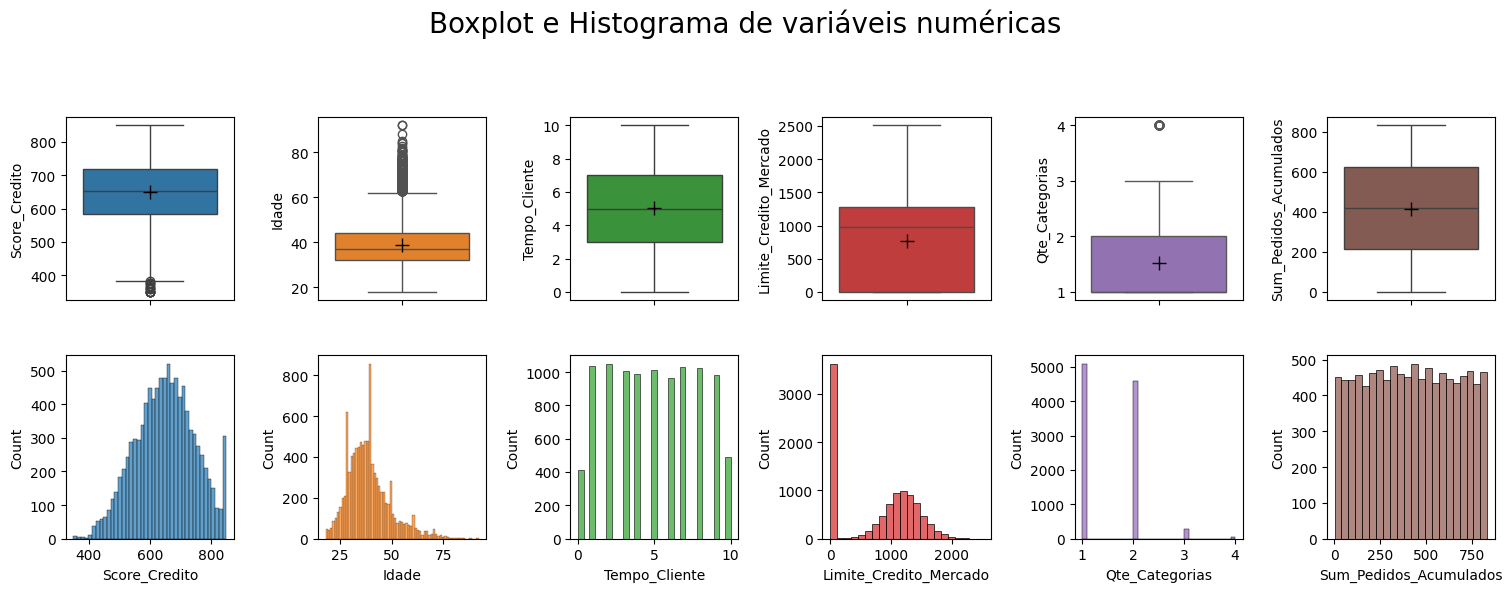

,Score_Credito,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Sum_Pedidos_Acumulados
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,764.86,1.53,417.04
std,96.65,10.49,2.89,623.97,0.58,239.63
min,350.00,18.00,0.00,0.00,1.00,0.05
25%,584.00,32.00,3.00,0.00,1.00,212.51
50%,652.00,37.00,5.00,971.99,1.00,417.47
75%,718.00,44.00,7.00,1276.44,2.00,622.45
max,850.00,92.00,10.00,2508.98,4.00,833.30


In [61]:
# Boxplots e histogramas
def plot_boxplot_and_histogram(dataframe):
    # Configuração do tamanho do gráfico
    plt.figure(figsize=(15, 6))

    # Criar uma paleta de cores com uma cor diferente para cada variável
    colors = sns.color_palette("tab10", len(dataframe.columns))

    # Iterar sobre cada feature e criar boxplot e histograma
    for i, var in enumerate(dataframe.columns, 1):
        # Subplot para boxplot
        plt.subplot(2, dataframe.shape[1], i)
        sns.boxplot(data=dataframe[var], showmeans=True,
                    meanprops={"marker": "+",
                               "markeredgecolor": "black",
                               "markersize": "10"}, color=colors[i-1])

        # Subplot para histograma
        plt.subplot(2, dataframe.shape[1], i + dataframe.shape[1])
        sns.histplot(data=dataframe, x=var, alpha=0.7, color=colors[i-1], edgecolor='black')

    # Configuração do título
    plt.suptitle('Boxplot e Histograma de variáveis numéricas', fontsize=20)

    plt.tight_layout()
    plt.subplots_adjust(
        top=0.8, right=1, # Ajustar a posição do título
        wspace=0.5, hspace=0.3) # Ajustar os espaçamentos entre os plots

    plt.show()

# plotando a função com 'numerical_variables'
plot_boxplot_and_histogram(numerical_variables)

numerical_variables.describe().style.format('{:.2f}')

***Insights***

- **Score de Crédito:** Existe uma ampla variação nos scores de crédito, com clientes distribuídos em diferentes faixas de pontuação. A média é de 650 pontos, com 50% dos clientes situados entre 584 e 718 pontos. (Utilizaremos a classificação de Scores a seguir para melhor entendimento desta variável)

- **Idade:** A empresa possui uma clientela diversificada em termos de idade, variando de 18 a 92 anos. Essa diversidade sugere possíveis variações em comportamentos e necessidades. No gráfico, é possível observar uma discrepância de clientes com idade acima dos 60 anos.

- **Tempo de Cliente:** A diferença no tempo em meses que os clientes utilizam o aplicativo indica a presença de tanto clientes novos quanto antigos, com comportamentos e necessidades potencialmente distintos.

- **Limite de Crédito:** Uma boa parte dos clientes não possui limite de crédito no mercado, sugerindo um baixo poder aquisitivo, o que pode impactar suas experiências e decisões de compra. Apenas 25% dos clientes têm mais de R\$ 1.276,44 em limite de crédito, o que pode estar relacionado com um maior poder aquisitivo.

- **Quantidade de Categorias:** A maioria dos clientes possui até duas categorias nos pedidos do aplicativo, sendo pelo menos 50% com apenas uma categoria, mostrando um envolvimento limitado com diferentes tipos de produtos.

- **Soma dos Pedidos Acumulados:** Há uma ampla variação nos gastos acumulados em três meses, refletindo diferentes níveis de envolvimento financeiro dos clientes com a empresa. O gasto médio três meses é de R\$ 417,04. O valor mínimo de R\$ 0,05 pode estar relacionado a um erro na base de dados, o que deve ser investigado.


##### 2.2.2.2 Variáveis Qualitativas (Categóricas)

***Feature engineering:***

Para a classificação de Scores utilizaremos as faixas de classificação do <a href="https://www.serasa.com.br/score/o-que-e-score/" target="_blank">Serasa Score</a>, um dos modelos estatísticos existentes no mercado para análise de risco de crédito.

O Serasa Score é dividido em quatro faixas de classificação, que indicam o risco de inadimplência.

Faixas de classificação do Serasa Score:
* Score **muito baixo**: de `0 a 300` pontos. Alto risco de inadimplência.
* Score **baixo**: de `301 a 500` pontos. Risco médio de inadimplência.
* Score **bom**: de `501 a 700` pontos. Baixo risco de inadimplência.
* Score **excelente**: de `701 a 1000` pontos. Muito baixo risco de inadimplência.

In [62]:
# Definindo os limites das faixas de classificação do Score
limites_faixas = [0, 301, 501, 701, 1000]

# Definir os rótulos para as faixas
rotulos_faixas = ['Muito baixo', 'Baixo', 'Bom', 'Excelente']

# Criar uma nova coluna 'Classe_Score'
df_churn['Classe_Score'] = pd.cut(df_churn['Score_Credito'], bins=limites_faixas, labels=rotulos_faixas, right=False)

**Separando as variáveis qualitativas (categóricas) das demais variáveis:**

In [63]:
# Separando as variáveis qualitativas (categóricas) das demais variáveis
categorical_variables = df_churn.select_dtypes(include=['object', 'category'])

# Incluindo as Flags armazenadas como número
categorical_variables[['Usa_Cartao_Credito', 'Programa_Fidelidade']] = df_churn[['Usa_Cartao_Credito', 'Programa_Fidelidade']]

print(categorical_variables.columns)

Index(['Estado', 'Gênero', 'Classe_Score', 'Usa_Cartao_Credito',
       'Programa_Fidelidade'],
      dtype='object')


**Tabelas de frequência:**

In [64]:
# Tabelas de frequência
for var in categorical_variables.columns:
  print("\nTabela frequência de", var)
  display(frequency_table(categorical_variables, var))


Tabela frequência de Estado


,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
Estado,,,
São Paulo,5014,50.14%,50.14%
Minas Gerais,2509,25.09%,75.23%
Rio de Janeiro,2477,24.77%,100.00%



Tabela frequência de Gênero


,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
Gênero,,,
Masculino,5457,54.57%,54.57%
Feminino,4543,45.43%,100.00%



Tabela frequência de Classe_Score


,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
Classe_Score,,,
Muito baixo,0,0.00%,0.00%
Baixo,643,6.43%,6.43%
Bom,6241,62.41%,68.84%
Excelente,3116,31.16%,100.00%



Tabela frequência de Usa_Cartao_Credito


,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
Usa_Cartao_Credito,,,
1,7055,70.55%,70.55%
0,2945,29.45%,100.00%



Tabela frequência de Programa_Fidelidade


,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
Programa_Fidelidade,,,
1,5151,51.51%,51.51%
0,4849,48.49%,100.00%


***Insights***

- **Estado:** Metade dos clientes realizam pedidos em São Paulo, enquanto Minas Gerais e Rio de Janeiro têm uma distribuição equilibrada, cada um com aproximadamente um quarto dos clientes.

- **Distribuição de Gênero:** A distribuição de clientes é ligeiramente dominada por homens (54,57%), mas a diferença em relação às mulheres (45,43%) não é extrema.

- **Classe de Score de Crédito:** A grande maioria dos clientes (93,57%) tem um score de crédito "Bom" ou "Excelente", com ausência de scores "Muito Baixo".

- **Uso de Cartão de Crédito:** A maioria dos clientes (70,55%) realiza pedidos utilizando cartão de crédito, destacando a popularidade desse método de pagamento.

- **Programa de Fidelidade:** Cerca de metade dos clientes (51,51%) aderiram ao programa de fidelidade, sugerindo uma **oportunidade** para **aumentar o engajamento**.

##### 2.2.2.3 Variável *Target*


Conforme definido na etapa de [entendimento do negócio](#target), classificaremos como ***churn*** o cliente que **não transacionou nos últimos 30 dias do período de observação**:
- `Churn = 1`: Cliente que **não realizou transações nos últimos 30 dias** anteriores a 30/10/2019.
- `Churn = 0`: Cliente que **realizou pelo menos uma transação nos últimos 30 dias** anteriores a 30/10/2019.

In [100]:
# Criando a variável 'data_corte_churn' para definir a data base como referência de corte.
data_corte_churn = pd.to_datetime('2019-10-30') - pd.to_timedelta(30, unit='d')
print(f'Data de corte: {data_corte_churn}')

# Criar a variável Churn
df_churn['Churn'] = (df_churn['DataUltimaTransacao'] <= data_corte_churn).astype(int)
taxa_churn = df_churn['Churn'].mean()

print(f'Taxa de churn: {taxa_churn:.2%}')

Data de corte: 2019-09-30 00:00:00
Taxa de churn: 20.37%


De acordo com o <a href="https://blog-parceiros.ifood.com.br/churn/" target="_blank">blog do iFood para parceiros</a>, o ideal é que a taxa de *churn* não ultrapasse 7%. Portanto, nossa meta inicial será reduzir o *churn* em 13,37 pontos percentuais.

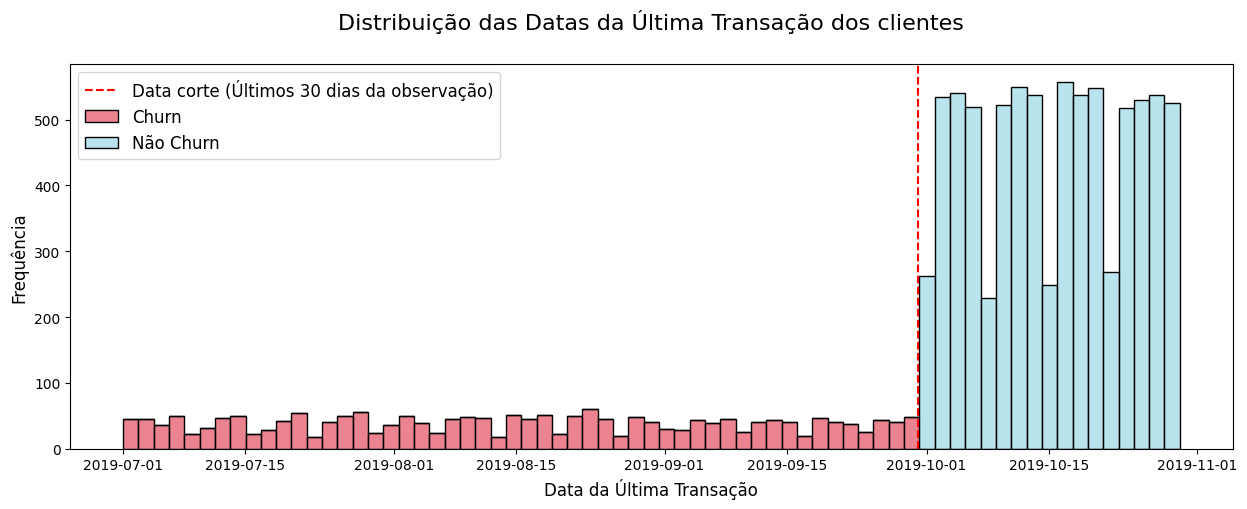

In [66]:
# Plotando o histograma com diferentes cores para as barras usando a coluna 'Churn'
plt.figure(figsize=(15, 5))
sns.histplot(data=df_churn, x='DataUltimaTransacao', hue='Churn', palette={1: '#e65a6d', 0: '#a3dce8'}, multiple='stack')

# Adicionando a linha vertical para a data de corte
plt.axvline(data_corte_churn, color='red', linestyle='--')

# Configurando o gráfico
plt.title('Distribuição das Datas da Última Transação dos clientes', pad=25, fontsize=16)
plt.xlabel('Data da Última Transação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(labels=['Data corte (Últimos 30 dias da observação)', 'Churn', 'Não Churn'], fontsize=12)
plt.show()

Podemos observar no gráfico que o *churn* parece ocorrer de forma distribuída ao longo dos dias, sem picos ou períodos de maior incidência que possam indicar um padrão sazonal ou temporal significativo.

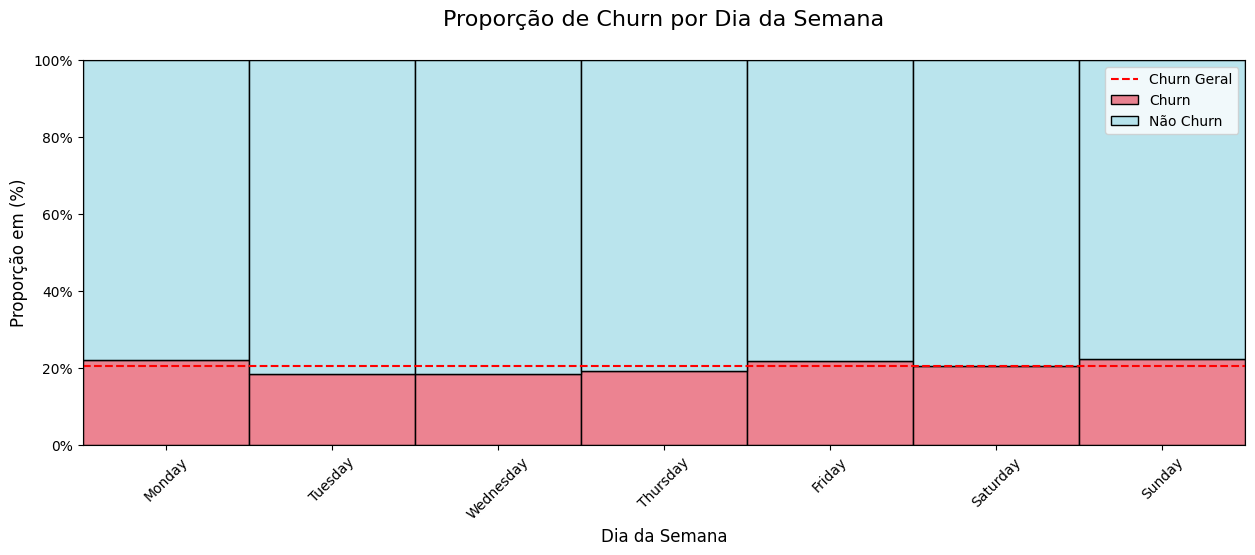

In [67]:
import matplotlib.ticker as mtick

# Adicionar coluna de dia da semana
df_churn['DiaSemana'] = df_churn['DataUltimaTransacao'].dt.day_name()

# Reordenar a coluna 'DiaSemana'
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_churn['DiaSemana'] = pd.Categorical(df_churn['DiaSemana'], categories=ordem_dias, ordered=True)


# Plotar a distribuição por dia da semana para churn e não churn
plt.figure(figsize=(15, 5))
sns.histplot(data=df_churn, x='DiaSemana', hue='Churn', multiple='fill', palette={1: '#e65a6d', 0: '#a3dce8'})
plt.title('Proporção de Churn por Dia da Semana', pad=25, fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Proporção em (%)', fontsize=12)
plt.xticks(rotation=45)

# Alterar o eixo y para porcentagem
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Inserir uma linha horizontal
plt.axhline(taxa_churn, color='red', linestyle='--')

plt.legend(labels=['Churn Geral', 'Churn', 'Não Churn'])
plt.show()

Da mesma forma, os dias da semana não apresentam padrão temporal significativo. Isso sugere que outros fatores, além do período, provavelmente têm um papel mais importante na determinação do *churn* dos clientes.

#### 2.2.3 Análise Bivariada

##### 2.2.3.1 Análise de Correlação e Associação

***Information Value (IV):***

Para **identificar os fatores** que estão mais relacionados com o *churn*, utilizaremos a técnica do *Information Value (IV)*. 
Essa medida é responsável por mensurar o "poder de separação/discriminação" que uma variável possui sobre nossa variável *target* (no caso, o *churn*).

Se uma variável tem poder médio, forte ou muito forte, significa que uma ou mais categorias da variável tem uma alta ou baixa taxa de *churn*, sendo útil estudá-la com mais profundidade.

In [68]:
# Instanciar InformationValue
iv = InformationValue(df_churn, 'Churn')

# Calcular o Information Value
iv.calculate_iv()

# Agrupando as variáveis Idade e Limite_Credito_Mercado
iv.set_grouping('Idade',por=5, finalizar_em=53)
iv.set_grouping('Limite_Credito_Mercado',por=500, finalizar_em=2000)
iv.calculate_iv()

# Poder de separação/discriminação das variáveis em relação ao Churn
print("Poder de separação/discriminação das variáveis em relação ao churn:")
iv.get_iv_predict()

Poder de separação/discriminação das variáveis em relação ao churn:


,IV,poder_separação
Variável,,
Qte_Categorias_bin,0.84,Muito Forte
Idade_bin,0.76,Muito Forte
Estado,0.17,Médio
Programa_Fidelidade_bin,0.15,Médio
Limite_Credito_Mercado_bin,0.10,Médio
Gênero,0.07,Fraco
DiaSemana,0.01,Muito fraco
Score_Credito_bin,0.01,Muito fraco
Classe_Score,0.00,Muito fraco


***IVs* Médio e Muito Forte:**

In [69]:
iv.visualize_results(min_iv=0.1)


                           Resultados de Information Value para 'Estado' e 'Churn'                           
╭────────────────┬────────┬───────┬───────┬─────────┬────────┬────────┬─────────────┬────────┬───────┬──────╮
│ Estado         │   freq │   sim │   não │   %freq │ %sim   │ %não   │   %taxa_sim │ Odds   │ WoE   │   IV │
├────────────────┼────────┼───────┼───────┼─────────┼────────┼────────┼─────────────┼────────┼───────┼──────┤
│ Minas Gerais   │   2509 │   814 │  1695 │   25.09 │ 39.96  │ 21.29  │       32.44 │ 1.88   │ 0.63  │ 0.12 │
├────────────────┼────────┼───────┼───────┼─────────┼────────┼────────┼─────────────┼────────┼───────┼──────┤
│ Rio de Janeiro │   2477 │   413 │  2064 │   24.77 │ 20.27  │ 25.92  │       16.67 │ 0.78   │ -0.25 │ 0.01 │
├────────────────┼────────┼───────┼───────┼─────────┼────────┼────────┼─────────────┼────────┼───────┼──────┤
│ São Paulo      │   5014 │   810 │  4204 │   50.14 │ 39.76  │ 52.79  │       16.15 │ 0.75   │ -0.28 │ 0.04 │
├────────

Principais ***insights*** para cada variável com base nos resultados do Information Value (IV) e seus impactos no *churn*:

1. **Qte_Categorias:**

    - ***Insight:*** 
        - Clientes que compram em apenas **uma categoria** de produtos têm uma taxa de *churn* de 27,71%.
        - Clientes que compram em **duas categorias** têm a menor taxa de *churn* (7,58%), indicando uma maior fidelidade.
        - Clientes que compram em **três ou mais categorias** apresentam taxas de churn extremamente altas (82,71% e 100%), mas representam uma pequena proporção da base total. Isso pode indicar um comportamento de risco ou uma segmentação específica de clientes com alta rotatividade.
            - **Hipótese:** É possível que as altas taxas de *churn* entre clientes que compram em três ou mais categorias estejam relacionadas a compras para eventos especiais, festas ou ocasiões únicas.

    - **Ação Potencial:** 
        - **Pesquisas de Satisfação e *Feedback* Direto:** Enviar pesquisas de satisfação direcionadas para clientes que compraram em três ou mais categorias e depois pararam de usar o serviço. As perguntas podem ser sobre suas experiências, dificuldades encontradas, e motivos para não retornarem.
        - **Testes A/B:** Realizar experimentos com diferentes grupos de clientes para testar hipóteses específicas. Por exemplo, incentivos adicionais (como descontos ou recompensas de fidelidade) oferecidos para clientes que compram em três ou mais categorias observando se isso reduz a taxa de *churn*.

2. **Idade:**

    - ***Insight:*** 
        - Idades menores (18-37 anos) têm menores taxas de *churn*, sugerindo um seguimento de público ideal por ter as melhores retenções.
        - Idades mais avançadas (38-92 anos) mostram um aumento gradual no *churn* com taxas significativamente mais altas.
    
    - **Ação Potencial:** 
        - Desenvolver diferentes estratégias de retenção para cada grupo etário, com foco específico nos clientes mais velhos que têm maior probabilidade de *churn*.

3. **Programa_Fidelidade:**
    - ***Insight:***
        - Clientes que não participam do programa de fidelidade têm uma taxa de *churn* significativamente maior (26,85%) do que aqueles que participam (14,27%).

    - **Ação Potencial:** 
        - Incentivar a adesão ao programa de fidelidade pode ajudar a reduzir o *churn*, mas o efeito atual é apenas moderado, sugerindo que o programa pode precisar ser melhorado e acompanhado por meio de experimentos para aumentar sua eficácia.

4. **Estado:**
    - ***Insight:***
        - Minas Gerais tem a maior taxa de *churn* (32,44%) enquanto Rio de Janeiro e São Paulo têm taxas de churn mais baixas (16,67% e 16,15%, respectivamente).

    - **Ação Potencial:** 
        - Enviar pesquisas de satisfação direcionadas para clientes de Minas Gerais que deixaram de usar o App para entender possíveis causas do *churn*.
        - Focar em estratégias de retenção específicas para clientes de Minas Gerais, onde o churn é mais elevado.

5. **Limite_Credito_Mercado:**
    - ***Insight:***
        - A taxa de churn parece aumentar à medida que o limite de crédito dos clientes também aumenta.
            - **Hipótese:** Esse comportamento pode estar relacionado ao poder aquisitivo dos clientes, sugerindo que aqueles com menor poder aquisitivo tendem a ser mais fiéis ao aplicativo. Por outro lado, clientes com maior poder aquisitivo podem ser mais propensos a explorar alternativas no mercado.

    - **Ação Potencial:**
        - O *Information Value (IV)* dessa variável está no limite entre médio e fraco, o que indica uma relevância limitada na previsão de *churn*. Além disso, como a obtenção dessa variável implica custos, devido à sua aquisição de um *bureau* de crédito, ela não deve ser considerada como o foco principal para estratégias de retenção.
        - A **inclusão de variáveis como salário, escolaridade, profissão e status de emprego** podem oferecer uma visão mais completa do perfil dos clientes, possibilitando o desenvolvimento de estratégias de retenção mais segmentadas e eficazes. Esses dados podem ser usados para entender melhor o comportamento e as expectativas dos clientes, essenciais na redução do *churn*.

            > Para obter essas informações de maneira eficaz e sem custos elevados, a empresa poderia integrar a coleta desses dados como parte de seu programa de fidelidade. Por meio de incentivos, como pontos extras, descontos exclusivos ou benefícios especiais, os clientes seriam encorajados a fornecer voluntariamente dados sobre seu perfil socioeconômico. 
            > Isso permitiria à empresa:
            > - Segmentar de forma mais precisa os clientes com base em seus perfis econômicos e sociais, criando ofertas e campanhas personalizadas para diferentes grupos.
            > - Desenvolver campanhas de retenção específicas para grupos identificados como de maior risco de *churn*. Por exemplo, clientes de maior renda poderiam ser alvo de ofertas exclusivas e serviços premium, enquanto clientes de menor renda receberiam promoções de descontos mais acessíveis.
            > - Aprimorar o modelo preditivo de *churn*, integrando variáveis mais precisas e relevantes, resultando em um modelo mais eficaz e na alocação otimizada de recursos para retenção.

***IVs* Fracos ou Muito Fracos:**

In [70]:
iv.visualize_results(max_iv=0.09)


                        Resultados de Information Value para 'Gênero' e 'Churn'                         
╭───────────┬────────┬───────┬───────┬─────────┬────────┬────────┬─────────────┬────────┬───────┬──────╮
│ Gênero    │   freq │   sim │   não │   %freq │ %sim   │ %não   │   %taxa_sim │ Odds   │ WoE   │   IV │
├───────────┼────────┼───────┼───────┼─────────┼────────┼────────┼─────────────┼────────┼───────┼──────┤
│ Feminino  │   4543 │  1139 │  3404 │   45.43 │ 55.92  │ 42.75  │       25.07 │ 1.31   │ 0.27  │ 0.04 │
├───────────┼────────┼───────┼───────┼─────────┼────────┼────────┼─────────────┼────────┼───────┼──────┤
│ Masculino │   5457 │   898 │  4559 │   54.57 │ 44.08  │ 57.25  │       16.46 │ 0.77   │ -0.26 │ 0.03 │
├───────────┼────────┼───────┼───────┼─────────┼────────┼────────┼─────────────┼────────┼───────┼──────┤
│ Total     │  10000 │  2037 │  7963 │  100    │        │        │       20.37 │        │       │ 0.07 │
╰───────────┴────────┴───────┴───────┴─────────┴──────

***Insight:*** 

Todas essas variáveis têm um poder de separação fraco ou muito fraco e, portanto, podem ser descartadas ou mantidas apenas para fins de controle, pois não contribuem significativamente para o nosso modelo de previsão de *churn*. 

> Apesar de haver uma alta taxa de *churn* de 32,97% na faixa de Score de Crédito 350-449, a quantidade de clientes nesta categoria é relativamente baixa, com apenas 185 indivíduos, o que faz com que essa informação não tenha impacto significativo no cálculo do *IV*.

**Análise de causalidade:**

Essa análise tem como objetivo entender como as variáveis se relacionam entre si. Essa informação é útil para tentar entender a real causa das variáveis que estão relacionadas com o *churn*.

A tabela a seguir mostra a **Correlação de Pearson** entre as variáveis numéricas. 

In [71]:
numerical_variables.corr(numeric_only=True).style.background_gradient(axis=None, vmin=-1, vmax=1, cmap='RdBu').format(precision=2)

,Score_Credito,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Sum_Pedidos_Acumulados
Score_Credito,1.00,-0.00,0.00,0.01,0.01,-0.00
Idade,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tempo_Cliente,0.00,-0.01,1.00,-0.01,0.01,0.01
Limite_Credito_Mercado,0.01,0.03,-0.01,1.00,-0.30,0.01
Qte_Categorias,0.01,-0.03,0.01,-0.30,1.00,0.01
Sum_Pedidos_Acumulados,-0.00,-0.01,0.01,0.01,0.01,1.00


Os valores de 0 a 0.30 positivo ou negativo indica uma correlação desprezível.

<Figure size 1500x800 with 0 Axes>

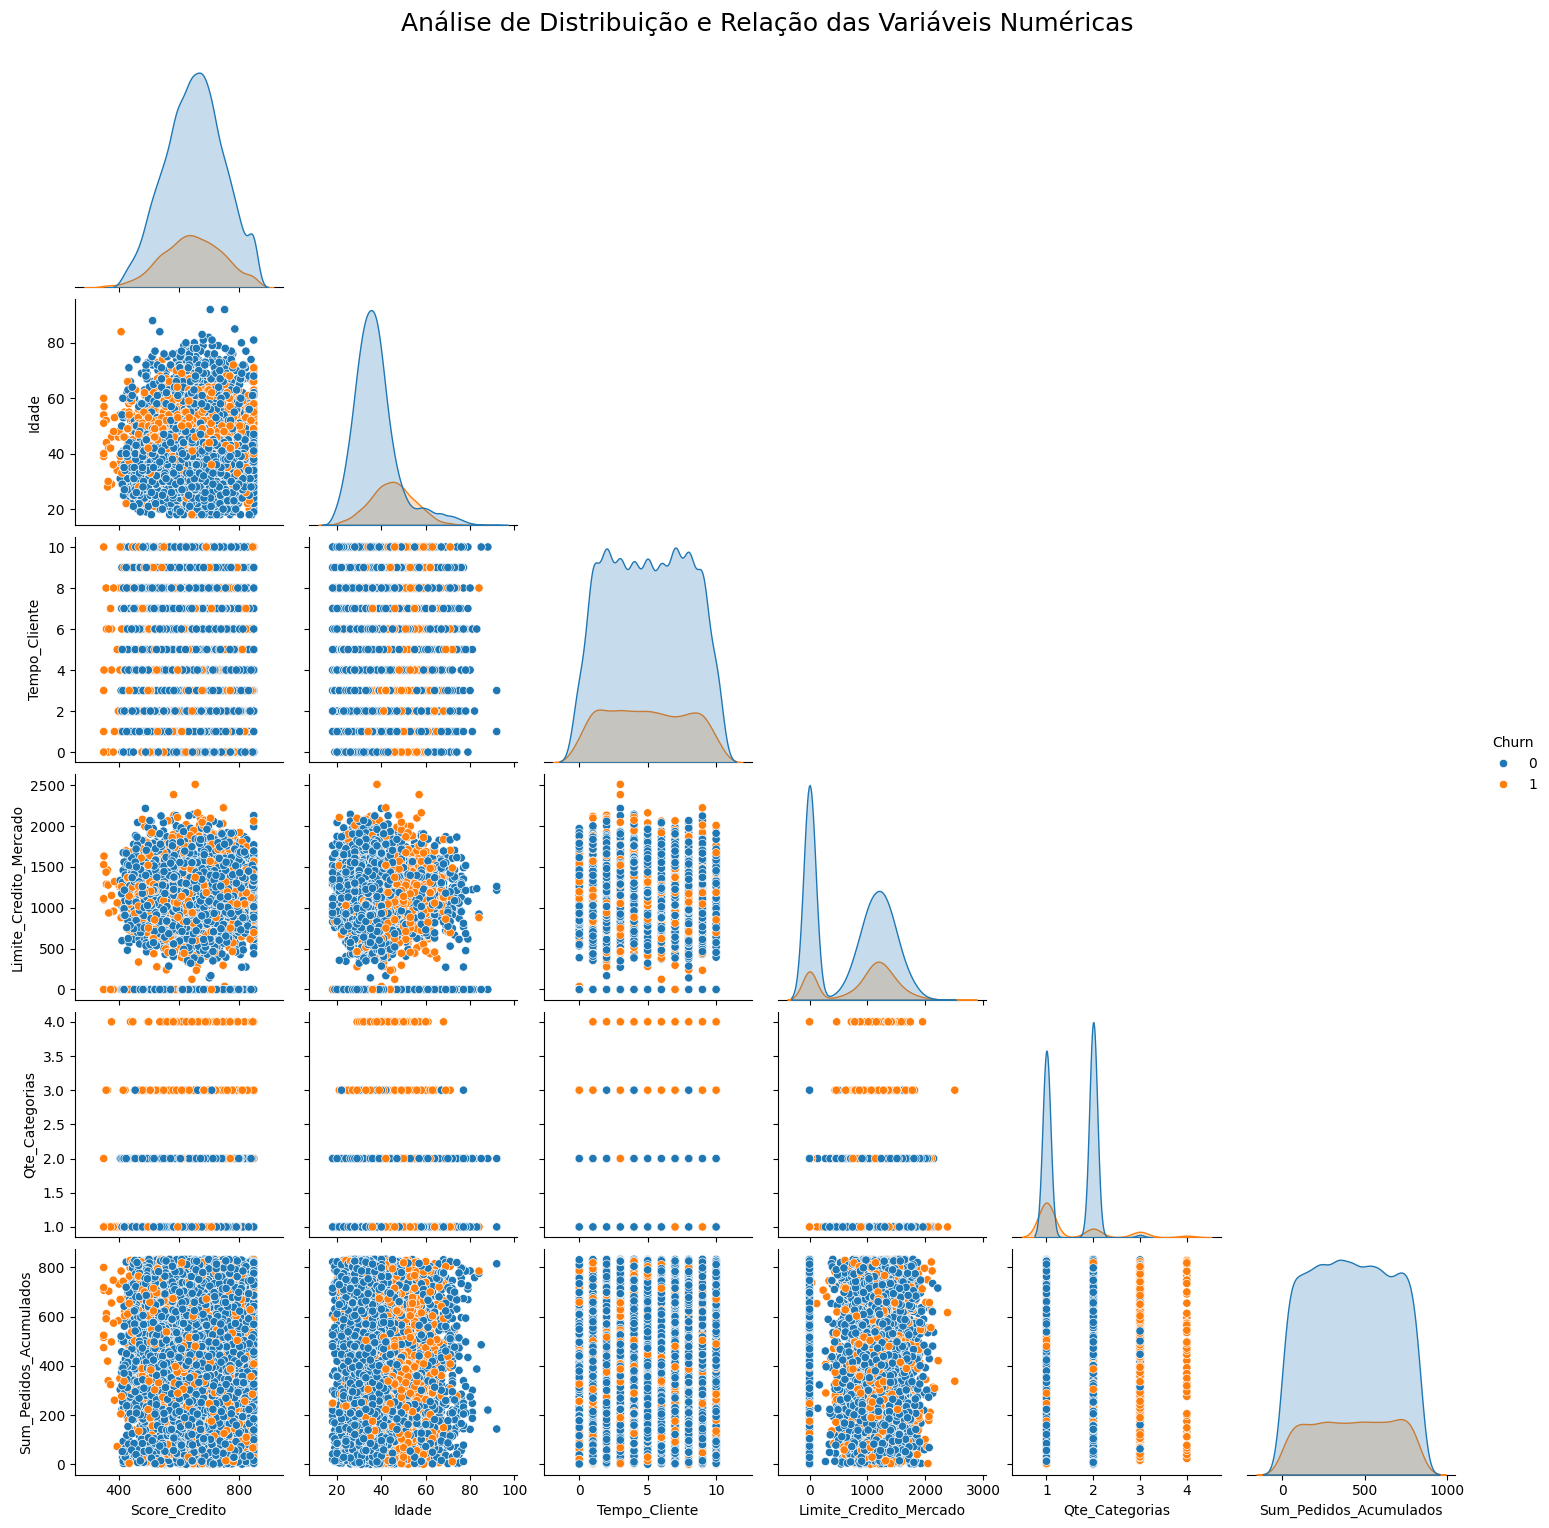

In [72]:
plt.figure(figsize=(15, 8))
pairplot = sns.pairplot(df_churn[list(numerical_variables.columns) + ['Churn']], hue='Churn', corner=True)

# Adiciona o título ao gráfico
pairplot.figure.suptitle('Análise de Distribuição e Relação das Variáveis Numéricas', fontsize=18, y=1.02)

plt.show()

Embora não haja uma relação linear evidente entre as variáveis quantitativas, as variáveis identificadas com poder de separação forte e médio pelo *IV* parecem ser suficientes para prever boa parte de clientes como *churn* e não *churn*.

Para medir a associação entre variáveis categóricas e numéricas utilizamos o **Coeficiente de Determinação (R²):**.

In [73]:
# Dicionário para armazenar os resultados em formato de matriz
resultados = {}

# Iterando entre as variáveis categóricas para calcular o r2
for categorical in categorical_variables.columns:
    resultados[categorical] = {}  # Inicializa o dicionário para cada categoria
    for numerical in numerical_variables.columns:
        # Calcula o valor de r2 e armazena no dicionário
        resultados[categorical][numerical] = r2(df_churn, categorical, numerical)[2]  # Armazena o valor do r2

# Criação do DataFrame a partir do dicionário de resultados
df_resultados = pd.DataFrame(resultados).T  # Transpõe o DataFrame para alinhar categóricas nas linhas e numéricas nas colunas

# Exibição do DataFrame
df_resultados.style\
    .background_gradient(axis=None, vmin=0, vmax=1, cmap='Blues')\
    .format("{:.2%}")  # Formata os valores como porcentagens com 2 casas decimais

,Score_Credito,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Sum_Pedidos_Acumulados
Estado,0.01%,0.24%,0.00%,16.09%,0.01%,0.01%
Gênero,0.00%,0.08%,0.02%,0.01%,0.05%,0.01%
Classe_Score,73.37%,0.00%,0.01%,0.03%,0.01%,0.03%
Usa_Cartao_Credito,0.00%,0.01%,0.05%,0.02%,0.00%,0.01%
Programa_Fidelidade,0.07%,0.73%,0.08%,0.01%,0.01%,0.01%


Desconsiderando a variável `Classe_Score` que foi gerada a partir de `Score_Credito`, vemos que a associação mais significativa é entre `Estado` e `Limite_Credito_Mercado`. O R² de 16,09% indica que o `Estado` explica 16,09% da variação de `Limite_Credito_Mercado` entre São Paulo, Rio de Janeiro e Minas Gerais.

A falta de correlações e associações significativas entre as variáveis explicativas em um modelo de previsão de *churn* são consideradas benéficas, pois aumentam a precisão e estabilidade ao reduzir a multicolinearidade, assegurando que cada variável forneça informações exclusivas. Dessa forma, o modelo consegue capturar diversos aspectos do comportamento do cliente, aprimorar sua capacidade de generalização e melhorar a interpretabilidade, facilitando a tomada de decisões fundamentadas nos *insights* obtidos.

## 3. Preparação dos Dados

### 3.1 Seleção das Variáveis

Descartar as variáveis com poder de separação fraco ou muito fraco traz diversos benefícios para a empresa. Ao focar apenas nas variáveis com poder de separação médio ou superior, o modelo se torna mais simples e fácil de interpretar, facilitando a comunicação dos resultados para executivos e outros *stakeholders* não técnicos. Além disso, a redução no número de variáveis processadas e armazenadas diminui o custo computacional, gerando economias significativas, especialmente em casos de grande volume de dados. Essa abordagem também eliminará a necessidade de adquirir dados externos, como `Score_Credito` e `Limite_Credito_Mercado` de um <a href="https://pt.wikipedia.org/wiki/Servi%C3%A7o_de_prote%C3%A7%C3%A3o_ao_cr%C3%A9dito" target="_blank">*bureau* de crédito</a>, reduzindo custos adicionais.

In [74]:
iv.get_iv_predict()

,IV,poder_separação
Variável,,
Qte_Categorias_bin,0.84,Muito Forte
Idade_bin,0.76,Muito Forte
Estado,0.17,Médio
Programa_Fidelidade_bin,0.15,Médio
Limite_Credito_Mercado_bin,0.10,Médio
Gênero,0.07,Fraco
DiaSemana,0.01,Muito fraco
Score_Credito_bin,0.01,Muito fraco
Classe_Score,0.00,Muito fraco


Dessa forma, selecionaremos apenas as variáveis com poder de separação médio ou superior, com exceção de `Limite_Credito_Mercado`, que gera custo ao ser adquirida de um *bureau* de crédito e está no limite entre um *IV* médio para fraco.

In [75]:
df_variaveis_selecionadas = df_churn[['Qte_Categorias', 'Idade', 'Estado', 'Programa_Fidelidade', 'Churn']].copy()
print('Variáveis selecionadas:')
df_variaveis_selecionadas.head()

Variáveis selecionadas:


,Qte_Categorias,Idade,Estado,Programa_Fidelidade,Churn
ClientId,,,,,
345568,1,42,São Paulo,1,1
345569,1,41,Rio de Janeiro,1,0
345570,3,42,São Paulo,0,1
345571,2,39,São Paulo,0,0
345572,1,43,Rio de Janeiro,1,0


## 4. Desenvolvimento do modelo

### 4.1 Desenvolvimento do Modelo *Baseline*

Nesta etapa, será desenvolvido um modelo de classificação simples utilizando **Regressão Logística** para estabelecer um ponto de partida (*baseline*) no projeto. O objetivo deste modelo inicial é fornecer uma referência de desempenho contra a qual modelos mais complexos poderão ser comparados. A partir dos resultados gerados, analisaremos métricas de desempenho para avaliar a eficácia do modelo na separação entre os clientes com alto e baixo risco de *churn*. Além disso, essas métricas ajudarão a identificar potenciais melhorias no modelo e a medir os impactos financeiros decorrentes da retenção de clientes, servindo como um guia para otimizações futuras.

#### 4.1.1 Regressão Logística

##### 4.1.1.1 Preparação dos Dados

**Pré-processamento dos dados:**

In [23]:
# Criando variáveis Dummy
df_prep_lr = pd.get_dummies(df_variaveis_selecionadas, drop_first=True, dtype=int)

# Divisão entre features e target
X = df_prep_lr.drop(columns=['Churn'])
y = df_prep_lr['Churn']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Padronização da escala usando conjunto de treino:**

In [24]:
# Padronização da escala usando conjunto de treino
x_scaler = StandardScaler()
x_scaler.fit(X_train)

columns = X.columns

X_train_scaled = pd.DataFrame()
X_test_scaled = pd.DataFrame()

X_train_scaled[columns] = x_scaler.transform(X_train[columns])
X_test_scaled[columns] = x_scaler.transform(X_test[columns])

##### 4.1.1.2 Ajuste do Modelo

In [25]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
print('Performance do modelo baseline:')
performance_logreg_baseline = calculate_performance(logreg, X_train_scaled, y_train, X_test_scaled, y_test)
performance_logreg_baseline.style.background_gradient(axis=None, subset=['Teste', 'Treino'])\
    .background_gradient(axis=None, subset=['Variação'], vmin=0, vmax=1, cmap='Reds')\
        .format({
            'Treino': '{:.3f}',
            'Teste': '{:.3f}',
            'Variação': lambda x: f'{x*100:.2f}%'
            })

Performance do modelo baseline:


,Treino,Teste,Variação
Métrica,,,
Acurácia,0.812,0.818,0.68%
AUROC,0.745,0.778,4.46%
KS,0.372,0.433,16.51%
Precision,0.641,0.684,6.78%
Recall,0.177,0.195,9.78%
F1,0.278,0.303,9.11%


##### 4.1.1.3 Extração do Aprendizado do modelo inicial

In [26]:
variavel = logreg.feature_names_in_
intercept = logreg.intercept_[0]
coef = logreg.coef_.ravel()

beta = pd.DataFrame({"Variável": ['Intercepto'] + list(variavel),
              "Coeficientes (β)": [intercept] + list(coef),
              "Odds": [np.exp(intercept)] + list(np.exp(coef)),
              "Incremento" : [None] + list(np.exp(coef) - 1),
              "Redução" : [None] + list(np.exp(-coef) - 1)
              })

beta.style.background_gradient(subset=["Incremento", "Redução"], cmap='RdBu_r')\
        .format({
            'Odds': '{:.3f}',
            'Incremento': '{:.2%}',
            'Redução': '{:.2%}'
            }, na_rep='')

,Variável,Coeficientes (β),Odds,Incremento,Redução
0,Intercepto,-1.599524,0.202,,
1,Qte_Categorias,-0.059686,0.942,-5.79%,6.15%
2,Idade,0.705463,2.025,102.48%,-50.61%
3,Programa_Fidelidade,-0.513131,0.599,-40.14%,67.05%
4,Estado_Rio de Janeiro,-0.400861,0.670,-33.03%,49.31%
5,Estado_São Paulo,-0.472557,0.623,-37.66%,60.41%


Vamos entender a magnitude do efeito das variáveis independentes:

- **Odds > 1:** A variável aumenta a chance de *churn*.
- **Odds < 1:** A variável diminui a chance de *churn*.
- **Odds = 1:** A variável não tem efeito significativo sobre a chance de *churn*.
- **Incremento:** Variação percentual na probabilidade de *churn* para cada incremento unitário na variável correspondente. Se o valor for positivo, significa que a chance de *churn* aumenta à medida que o valor da variável cresce.
- **Redução:** Esta coluna reflete a variação percentual na probabilidade de *churn* para cada redução unitária na variável. Se o valor for negativo, isso implica que a chance de *churn* diminui conforme o valor da variável decresce.

**Equação do Modelo:**
> Churn = $\beta_0$ + $\beta_1$ * Qte_Categorias + $\beta_2$ * Idade + $\beta_3$ * Programa_Fidelidade + $\beta_4$ * Estado_Rio de Janeiro + $\beta_5$ * Estado_São Paulo	

**$e^{\beta_0}$:** Chance de *churn* de um cliente quando todas as variáveis independentes são zero:

In [27]:
print(f"{beta.iloc[0]['Odds']:.2%}")

20.20%


**$e^{\beta_1}$:** Para cada aumento de uma unidade na quantidade de categorias, a chance de *churn* diminui aproximadamente 5,79%.

In [28]:
print(f"Variável: {beta.iloc[1]['Variável']}")
print(f"Incremento: {(beta.iloc[1]['Incremento']):.2%}")
print(f"Redução: {(beta.iloc[1]['Redução']):.2%}")

Variável: Qte_Categorias
Incremento: -5.79%
Redução: 6.15%


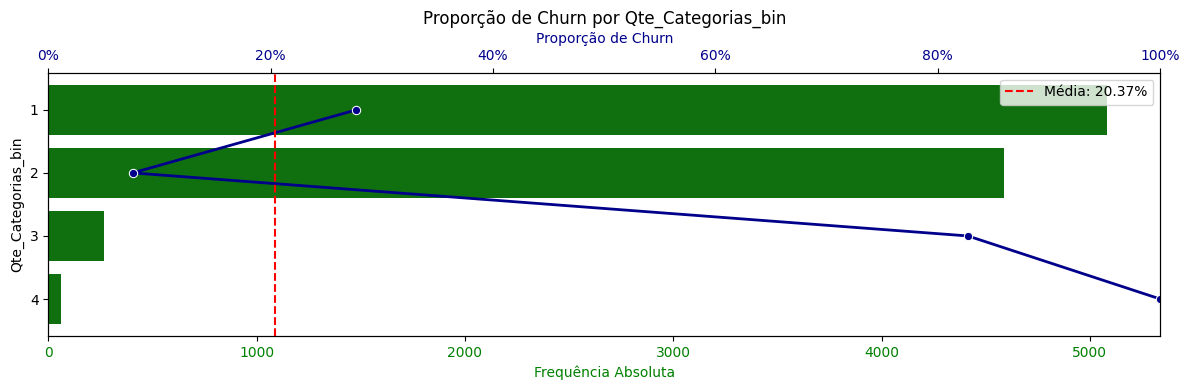

In [29]:
iv.plot_bivariada('Qte_Categorias_bin')

**$e^{\beta_2}$:** Para cada ano adicional de idade, a chance de *churn* aumenta aproximadamente 102,48%.

In [30]:
print(f"Variável: {beta.iloc[2]['Variável']}")
print(f"Incremento: {(beta.iloc[2]['Incremento']):.2%}")
print(f"Redução: {(beta.iloc[2]['Redução']):.2%}")

Variável: Idade
Incremento: 102.48%
Redução: -50.61%


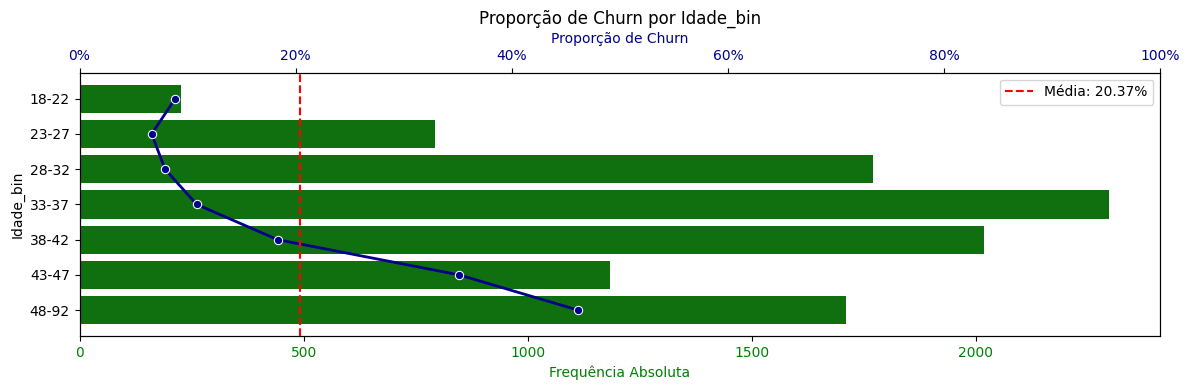

In [31]:
iv.plot_bivariada('Idade_bin')

**$e^{\beta_3}$:** Clientes inscritos no programa de fidelidade têm uma chance de *churn* aproximadamente 40,14% menor.

In [32]:
print(f"Variável: {beta.iloc[3]['Variável']}")
print(f"Incremento: {(beta.iloc[3]['Incremento']):.2%}")
print(f"Redução: {(beta.iloc[3]['Redução']):.2%}")

Variável: Programa_Fidelidade
Incremento: -40.14%
Redução: 67.05%


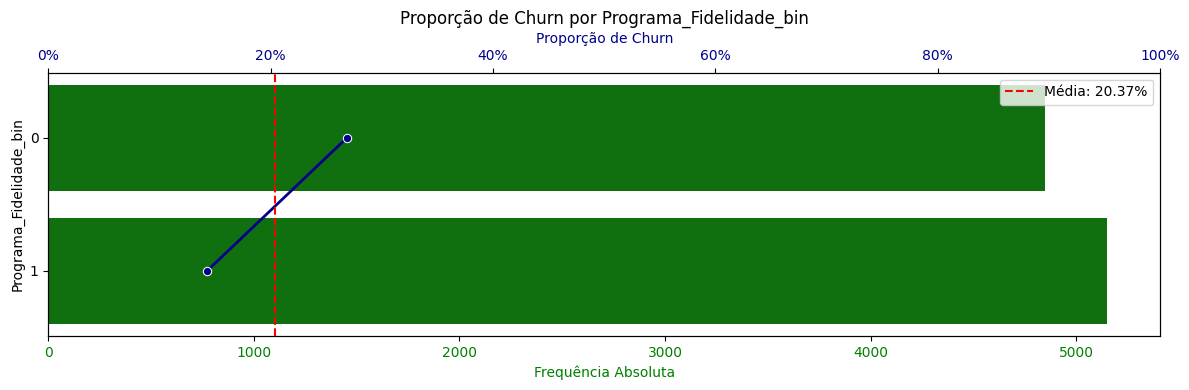

In [33]:
iv.plot_bivariada('Programa_Fidelidade_bin')

**$e^{\beta_4}$:** Clientes do Rio de Janeiro têm uma chance de *churn* aproximadamente 33,03% menor comparado aos clientes de Minas Gerais.

In [34]:
print(f"Variável: {beta.iloc[4]['Variável']}")
print(f"Incremento: {(beta.iloc[4]['Incremento']):.2%}")
print(f"Redução: {(beta.iloc[4]['Redução']):.2%}")

Variável: Estado_Rio de Janeiro
Incremento: -33.03%
Redução: 49.31%


**$e^{\beta_5}$:** Clientes de São Paulo têm uma chance de *churn* aproximadamente 37,66% menor comparado aos clientes de Minas Gerais.

In [35]:
print(f"Variável: {beta.iloc[5]['Variável']}")
print(f"Incremento: {(beta.iloc[5]['Incremento']):.2%}")
print(f"Redução: {(beta.iloc[5]['Redução']):.2%}")

Variável: Estado_São Paulo
Incremento: -37.66%
Redução: 60.41%


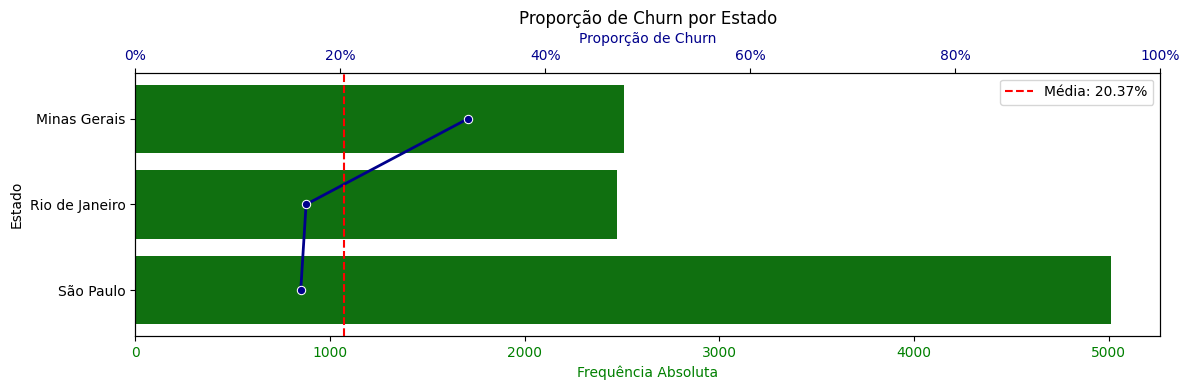

In [36]:
iv.plot_bivariada('Estado')

##### 4.1.1.4 Analise de Impacto nos Negócios

Na análise de *churn*, a Matriz de Confusão e o Relatório de Classificação são ferramentas essenciais para avaliar o desempenho do modelo de classificação ao prever se um cliente irá ou não desistir. 

Antes de avaliar o desempenho do modelo, é fundamental identificar as principais métricas a serem consideradas, como *precision*, *recall*, *F1-score* e *accuracy*. Essas métricas devem estar alinhadas com a estratégia proposta, levando em conta os objetivos do negócio e o impacto financeiro de cada decisão. Assim, a análise permite otimizar ações de retenção, ao balancear o custo de errar predições com os benefícios de reter clientes de maior risco.

**Parâmetros financeiros:**

In [37]:
n_cliente = 10_000

# Custo de Aquisição de Cliente
CAC = 150.00
print(f'CAC (Custo de Aquisição de Cliente): R$ {valor(CAC)}.')

# Cupom de desconto para manter o cliente
CUPOM = 30.00
print(f'Cupom de desconto para manter o cliente: R$ {valor(CUPOM)}.')

# Ticket Médio Mensal
ticket_medio_mensal = df_churn['Sum_Pedidos_Acumulados'] / 3

# LTV médio (Lifetime Value)
LTV = (df_churn['Tempo_Cliente'] * ticket_medio_mensal).mean()
print(f'LTV (Lifetime Value) médio estimado com base na amostra dos 10.000 clientes: R$ {valor(LTV)}.')

CAC (Custo de Aquisição de Cliente): R$ 150,00.
Cupom de desconto para manter o cliente: R$ 30,00.
LTV (Lifetime Value) médio estimado com base na amostra dos 10.000 clientes: R$ 698,65.


**Matriz de custos:**

Agora que temos os parâmetros financeiros, podemos ter uma visão geral de cada tipo de resultado possível e seus impactos utilizando a **estratégia de envio de cupons para evitar o *churn***.

- **Verdadeiro Positivo (TP)** 

    Clientes que **irão *churn*** e foram corretamente classificados como ***churn*** pelo modelo.

In [38]:
# Custo adicional do cupom de desconto para tentativa de retenção desses clientes.
impacto_TP = LTV - CAC - CUPOM

- **Verdadeiro Negativo (TN)**

    Clientes que **não irão *churn*** e foram corretamente classificados como **não *churn*** pelo modelo.

In [39]:
# Esses são acertos do modelo que não gera custos adicionais, 
# pois ele identificou corretamente os clientes que não irão churn.
impacto_TN = LTV - CAC 

- **Falso Positivo (FP)**

    Clientes que **não irão *churn***, mas foram incorretamente classificados como ***churn*** pelo modelo.

In [40]:
# Custo desnecessário associado a tentativas de retenção para clientes que na verdade não iriam churn.
# Ganhamos o mesmo valor de TP, mas perdemos a oportunidade de ganho de TN caso o modelo acertasse.
impacto_FP = impacto_TP - impacto_TN 

- **Falso Negativo (FN)**
    
    Clientes que **irão *churn***, mas foram incorretamente classificados como ***não churn*** pelo modelo.

In [41]:
# Este é um erro crítico do modelo. 
# Perdemos a oportunidade de ganho do mesmo valor de TP caso o modelo acertasse.
impacto_FN = - impacto_TP

**Matriz de custos financeiros:**

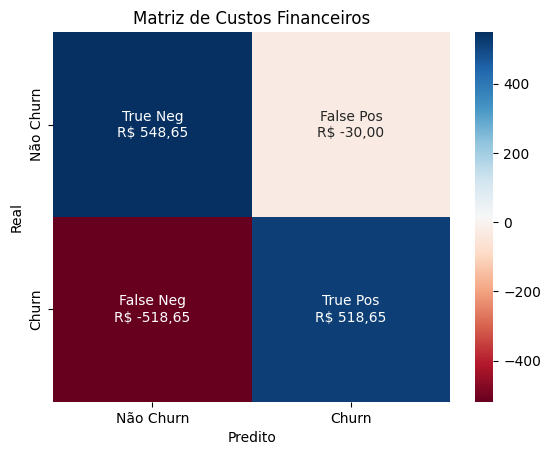

In [42]:
# Criar a matriz de custos financeiros
matriz_custos = np.array([[impacto_TN, impacto_FP],
                          [impacto_FN, impacto_TP]])


group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"R$ {valor(value)}" for value in matriz_custos.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matriz_custos, annot=labels, fmt='', cmap='RdBu')

# Alterar os nomes dos eixos
plt.xticks(ticks=[0.5, 1.5], labels=['Não Churn', 'Churn'], fontsize=10)
plt.yticks(ticks=[0.5, 1.5], labels=['Não Churn', 'Churn'], fontsize=10)

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Custos Financeiros')
plt.show()

O maior custo financeiro associado ao **Falso Negativo (FN)** significa que o erro de prever que um cliente não churnará quando, na verdade, ele churna é o mais caro para o negócio. 

A métrica de modelo que busca minimizar esse tipo de erro é o ***Recall* (Sensibilidade):**

O *Recall*, também conhecido como sensibilidade ou taxa de verdadeiros positivos, é a proporção de casos positivos reais (*churn*) que foram corretamente identificados pelo modelo.

- **Interpretação:**
   - Um *Recall* alto significa que o modelo está captando uma grande proporção dos clientes que realmente deixaram o serviço.
   - Um *Recall* baixo indica que o modelo está perdendo muitos casos de *churn* real.

- **Por que otimizar o *Recall*?** 
   - Ao maximizar o ***Recall***, minimizaremos o número de falsos negativos (FN), reduzindo o custo mais alto do negócio.


**Matriz de Confusão para o modelo *baseline*:**

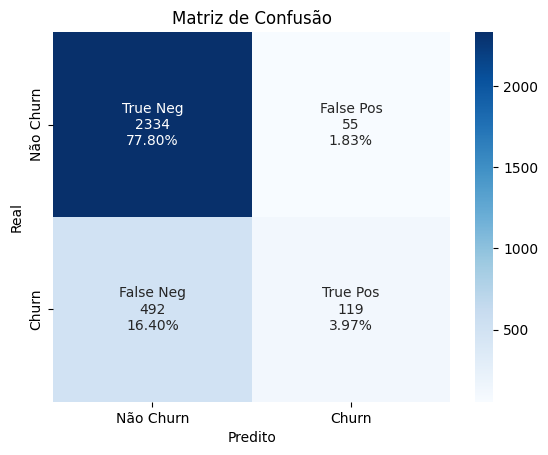

In [43]:
# Previsões no conjunto de teste
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Alterar os nomes dos eixos
plt.xticks(ticks=[0.5, 1.5], labels=['Não Churn', 'Churn'], fontsize=10)
plt.yticks(ticks=[0.5, 1.5], labels=['Não Churn', 'Churn'], fontsize=10)

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**Cálculo do ganho para o modelo *baseline*:**

Para calcular o ganho total ao utilizar o modelo, devemos multiplicar a quantidade de casos da matriz de confusão pelo respectivo custo da matriz de custo:

In [44]:
def impacto_financeiro(array, zero, um):
    # Criando o DataFrame com multiindex
    df = pd.DataFrame(array, 
                  index=pd.MultiIndex.from_product([['Real'], [zero, um]]),
                  columns=pd.MultiIndex.from_product([['Predito'], [zero, um]]))
    # Adicionando totais
    df[('Predito', 'Total')] = df.sum(axis=1)
    df.loc[('Real', 'Total'), :] = df.sum()
    return df

# Multiplicando as matrizes e normalizando por 3000
resultado = conf_matrix * matriz_custos / 3_000 * n_cliente

df_resultado_modelo_baseline = impacto_financeiro(resultado, 'Não Churn', 'Churn')

print('Impacto financeiro para 10.000 clientes usando o modelo baseline:')
df_resultado_modelo_baseline.style.format(precision=2, decimal=',', thousands='.')

Impacto financeiro para 10.000 clientes usando o modelo baseline:



**Cálculo do ganho sem o modelo (método atual):**

Se não utilizássemos o modelo, todos os clientes *churn* e não *churn* seriam tratados da mesma forma, pois sem o modelo, não há intervenção. Assim, iriamos predizer que todos os clientes seriam não *churn*.

In [45]:
# Ao aplicar o corte de probabilidade de 100% para gerar previsões binárias, 
# teremos uma matriz de confusão que classifica todos os clientes como não churn
y_pred_no_model = (y_prob >= 1).astype(int)

# Calcular a matriz de confusão
conf_matrix_sem_modelo = confusion_matrix(y_test, y_pred_no_model)

# Multiplicando as matrizes e normalizando por 3000
resultado = conf_matrix_sem_modelo * matriz_custos / 3_000 * n_cliente

df_resultado_sem_modelo = impacto_financeiro(resultado, 'Não Churn', 'Churn')

print('Impacto financeiro para 10.000 clientes sem o uso do modelo baseline:')
df_resultado_sem_modelo.style.format(precision=2, decimal=',', thousands='.')

Impacto financeiro para 10.000 clientes sem o uso do modelo baseline:


In [46]:
# Ganho em relação ao Método Atual (R$)
df_ganho_em_valor_financeiro = df_resultado_modelo_baseline - df_resultado_sem_modelo

print('Ganho potencial ao usar o modelo (em R$):')
df_ganho_em_valor_financeiro.style.format(precision=2, decimal=',', thousands='.')

Ganho potencial ao usar o modelo (em R$):


In [47]:
ganho_total = df_ganho_em_valor_financeiro[('Predito', 'Total')][('Real', 'Total')]
ganho_sem_modelo = df_resultado_sem_modelo[('Predito', 'Total')][('Real', 'Total')]
ganho_em_percentual = ( ganho_total / ganho_sem_modelo)
print(f'Ganho potencial ao usar o modelo (em %): {ganho_em_percentual:.2%}')

Ganho potencial ao usar o modelo (em %): 9.22%


Ao utilizar o modelo *baseline*, mesmo com o corte de probabilidade padrão de 0,5 e sem ajustes adicionais, o ganho financeiro potencial seria de R$ 305.375,58, um aumento de 9,22% sobre o método atual.

**Área sob a Curva ROC (AUC-ROC):**

A AUC-ROC é uma métrica que avalia o desempenho de modelos de classificação binária ao longo de vários limites de decisão (cortes de probabilidade). Ela calcula a área sob a curva que mostra a relação entre a *Taxa de Verdadeiros Positivos* (*Recall*) e a *Taxa de Falsos Positivos*. Quanto mais próxima de 1 for a AUC-ROC, melhor o modelo é em diferenciar corretamente as classes. Um valor de 0,5 indica que o modelo não possui poder de discriminação, equivalente a um palpite aleatório, enquanto um valor de 1 reflete um desempenho ideal, com separação perfeita das classes.

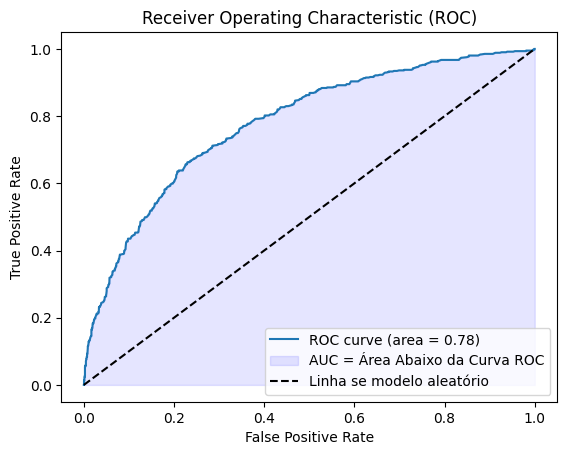

In [48]:
# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Linha se modelo aleatório')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Relatório de classificação:**

In [49]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2389
           1       0.68      0.19      0.30       611

    accuracy                           0.82      3000
   macro avg       0.75      0.59      0.60      3000
weighted avg       0.80      0.82      0.77      3000



Interpretação das principais métricas de desempenho para Classe 1 (*Churn*)

- *Precision*: Quando o modelo prevê *churn*, 68% dessas predições estão corretas.

- *Recall*: O modelo identifica apenas 19% dos clientes que churnam. Isso significa que muitos *churns* estão sendo perdidos, limitando as ações preventivas.

- *F1-Score*: O valor de 0,30 indica um desequilíbrio entre *precision* e *recall*. Embora essa métrica seja útil para equilibrar falsos positivos e falsos negativos, neste modelo nosso foco é reduzir os falsos negativos.

O baixo desempenho na detecção de *churn* pode levar a perdas financeiras associadas a custos de oportunidade, já que muitos clientes não são identificados a tempo para ações de retenção. Para aumentar a eficiência nas estratégias de retenção, o modelo precisará melhorar o *recall*, o que possibilitará identificar mais casos reais de *churn*, minimizando os falsos negativos e, consequentemente, reduzindo o maior custo para o negócio.


##### 4.1.1.5 *Syncs* com *Stakeholders*:

As *syncs* com *stakeholders* são essenciais para garantir o alinhamento entre o desenvolvimento do modelo de *churn* e as expectativas do negócio. Durante essas reuniões periódicas, apresentamos descobertas importantes, como *insights* extraídos na fase de análise exploratória, o impacto do desempenho do modelo na retenção de clientes e nas finanças, além de discutir ações para melhoria das métricas como *recall* e falsos negativos. 

Esses encontros também são fundamentais para ajustar o escopo do projeto, caso novas necessidades surjam ou mudanças estratégicas sejam necessárias. O *feedback* contínuo dos *stakeholders* permite adaptar o modelo às prioridades do negócio, garantindo que a solução entregue tenha impacto real e mensurável.

##### 4.1.1.6 Atualização de Métricas/*Backlog*:

Nas etapas a seguir, exploraremos modelos mais avançados, como *Random Forest* e outros modelos *ensemble*, com o objetivo de identificar um Modelo Mínimo Viável (MVM) que atenda às necessidades do negócio.

O ajuste de hiperparâmetros (*tuning*) será fundamental para otimizar o desempenho do modelo, especialmente no *recall* e no lucro esperado. A melhoria dessas métricas aumenta a precisão na detecção de clientes com risco de *churn*, minimizando falsos negativos.

A modificação do *threshold* de decisão padrão (0.5) será explorada para reduzir o custo associado aos falsos negativos. Utilizando uma função de custo personalizada, focada na maximização direta do lucro, alinharemos o modelo de forma mais estreita com os objetivos do negócio, garantindo que a retenção de clientes seja otimizada de maneira eficiente e lucrativa.

### 4.2 Teste de modelos mais complexos

#### 4.2.1 *Bagging* de Regressão Logística

##### 4.2.1.1 Ajuste do Modelo

In [50]:
# Inicia o estimador base para o Bagging
modelo_bagging_lr = LogisticRegression(max_iter=1000)

# Classificador de Bagging
modelo_bagging_lr = BaggingClassifier(estimator = modelo_bagging_lr, 
                                   n_estimators = 100, 
                                   max_samples=0.5,
                                   random_state = 42) 

# Ajuste do Modelo
modelo_bagging_lr.fit(X_train_scaled, y_train)

# Métricas de Desempenho
print('Métricas de desempenho para o Bagging de Regressão Logística:')
performance_bagging_lr = calculate_performance(modelo_bagging_lr, X_train_scaled, y_train, X_test_scaled, y_test)
performance_bagging_lr.style.background_gradient(axis=None, subset=['Teste', 'Treino'])\
    .background_gradient(axis=None, subset=['Variação'], vmin=0, vmax=1, cmap='Reds')\
        .format({
            'Treino': '{:.3f}',
            'Teste': '{:.3f}',
            'Variação': lambda x: f'{x*100:.2f}%'
            })

Métricas de desempenho para o Bagging de Regressão Logística:


,Treino,Teste,Variação
Métrica,,,
Acurácia,0.811,0.818,0.79%
AUROC,0.746,0.779,4.42%
KS,0.373,0.435,16.38%
Precision,0.633,0.684,8.06%
Recall,0.175,0.195,11.09%
F1,0.275,0.303,10.42%


In [51]:
variacao_performance = ((performance_bagging_lr / performance_logreg_baseline) - 1)
print('Variação da performance de Bagging de Regressão Logística sobre o modelo baseline:')
variacao_performance.style\
    .background_gradient(subset=['Teste', 'Treino'], vmin=-1, vmax=1, cmap='RdBu')\
        .background_gradient(subset=['Variação'], vmin=-1, vmax=1, cmap='RdBu_r').format("{:.2%}")

Variação da performance de Bagging de Regressão Logística sobre o modelo baseline:


,Treino,Teste,Variação
Métrica,,,
Acurácia,-0.11%,0.00%,15.64%
AUROC,0.11%,0.07%,-0.84%
KS,0.49%,0.38%,-0.77%
Precision,-1.19%,0.00%,18.91%
Recall,-1.19%,0.00%,13.48%
F1,-1.19%,0.00%,14.37%


#### 4.2.2 *Random Forest*

##### 4.2.2.1 Preparação dos Dados

**Pré-processamento dos dados:**

In [52]:
# Pré-processamento
df_prep_rf = pd.get_dummies(df_variaveis_selecionadas, drop_first=False, dtype=int)

# Divisão entre features e target
X = df_prep_rf.drop('Churn', axis=1)
y = df_prep_rf['Churn']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Padronização da escala usando conjunto de treino:**

In [53]:
# Padronização da Escala usando conjunto de treino
x_scaler = StandardScaler()
x_scaler.fit(X_train)

columns = X_train.columns

X_train_scaled = pd.DataFrame()
X_test_scaled = pd.DataFrame()

X_train_scaled[columns] = x_scaler.transform(X_train[columns])
X_test_scaled[columns] = x_scaler.transform(X_test[columns])

##### 4.2.2.2 Ajuste do Modelo

In [125]:
modelo_rf = RandomForestClassifier(n_estimators=100,
                                   min_samples_leaf=3, 
                                   max_depth=10,
                                   random_state = 42)
modelo_rf.fit(X_train_scaled, y_train)

# Métricas de Desempenho
print('Métricas de desempenho para o RandomForestClassifier:')
performance_rf = calculate_performance(modelo_rf, X_train_scaled, y_train, X_test_scaled, y_test)
performance_rf.style.background_gradient(axis=None, subset=['Teste', 'Treino'])\
    .background_gradient(axis=None, subset=['Variação'], vmin=0, vmax=1, cmap='Reds')\
        .format({
            'Treino': '{:.3f}',
            'Teste': '{:.3f}',
            'Variação': lambda x: f'{x*100:.2f}%'
            })

Métricas de desempenho para o RandomForestClassifier:


,Treino,Teste,Variação
Métrica,,,
Acurácia,0.867,0.856,1.25%
AUROC,0.879,0.849,3.52%
KS,0.579,0.544,6.09%
Precision,0.816,0.757,7.16%
Recall,0.450,0.434,3.51%
F1,0.580,0.552,4.84%


In [126]:
variacao_performance = ((performance_rf / performance_logreg_baseline) - 1)
print('Variação da performance de RandomForestClassifier sobre o modelo baseline:')
variacao_performance.style\
    .background_gradient(subset=['Teste', 'Treino'], vmin=-1, vmax=1, cmap='RdBu')\
        .background_gradient(subset=['Variação'], vmin=-1, vmax=1, cmap='RdBu_r').format("{:.2%}")

Variação da performance de RandomForestClassifier sobre o modelo baseline:


,Treino,Teste,Variação
Métrica,,,
Acurácia,6.77%,4.73%,83.28%
AUROC,18.06%,9.04%,-21.15%
KS,55.83%,25.61%,-63.14%
Precision,27.32%,10.71%,5.64%
Recall,153.36%,122.69%,-64.06%
F1,108.58%,81.91%,-46.86%


Dado que o modelo *Random Forest* demonstrou um desempenho superior ao *Bagging* de Regressão Logística, mesmo sem o ajuste dos hiperparâmetros, e apresentou um aumento de todas as métricas (com destaque de 122,69% no *recall*) em relação ao modelo *baseline*, optaremos por seguir com o *Random Forest* para otimizar hiperparâmetros e definir o Modelo Mínimo Viável (MVM).

##### 4.2.2.3 *Tuning* de hiperparâmetros

O principal objetivo desta etapa do projeto é encontrar a **melhor combinação de parâmetros para o modelo de *Machine Learning*** ao prever o *churn* de clientes. Para isso, estamos ajustando e testando várias configurações de um algoritmo de classificação *Random Forest* para **maximizar o desempenho do *recall* na previsão de clientes que irão churnar, minimizando, ao mesmo tempo, a variação entre os resultados em treino e teste.**

Os **dados de treinamento** serão divididos em 5 partes (ou *folds*) para realizar uma **validação cruzada estratificada**. Cada *fold* gera novos subconjuntos de variáveis `X_train` e `X_test`, que são padronizados isoladamente na função `skf_split()`, além das variáveis `y_train` e `y_test`, que representam as respostas correspondentes para treinamento e teste. Esse processo permite ajustar os hiperparâmetros do modelo de forma mais robusta e confiável.


![Ilustração das partição para o tuning de hiperparâmetro com cross validation](../../imagens/cross_validation.png)

*Adaptado de scikit-learn, fonte: <a href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_blank">https://scikit-learn.org/stable/modules/cross_validation.html</a>*


In [127]:
scaler = StandardScaler()
splits = skf_split(X=X_train, y=y_train, scaler=scaler, n_splits=5, shuffle=True, random_state=42)

**Definição da Função Objetivo para Hyperopt:**

A biblioteca **Hyperopt** utiliza *Bayesian Optimization* para otimizar os parâmetros do modelo, chamando a função objetivo por meio da função `fmin()`, que testa diferentes valores gerados a partir do espaço de hiperparâmetros definido em `space`.

A função `objective()` instancia um novo modelo a cada iteração com os hiperparâmetros fornecidos, realiza uma validação cruzada estratificada chamando a função `cv_recall_score()`, e então calcula a <a href="https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana" target="_blank">distância euclidiana</a> entre o desempenho atual do modelo (recall médio em teste e variação média entre treino e teste) e o "ponto ótimo" (máximo recall possível com mínima variação possível).

O processo de otimização busca minimizar essa distância, identificando a configuração de hiperparâmetros que mais se aproxima do ponto ótimo. Encontrar os hiperparâmetros que proporcionam o maior *recall* médio e menor variância permite uma avaliação mais precisa do desempenho do modelo e busca garantir a generalização para dados novos.

In [128]:
def objective(space):
    print ('Hiperparametros testados: ', space)
    model = RandomForestClassifier(
        n_estimators=int(space['n_estimators']),
        class_weight=space['class_weight'],
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        min_samples_leaf=int(space['min_samples_leaf']),
        criterion=space['criterion'],
        verbose=0,
        random_state=42,
        n_jobs=-1
    )
    
    cv = cv_recall_score(model, splits)

    # Coordenadas dos dois pontos
    # Ponto ótimo: Maior recall médio possível com a menor variação possível
    x1, y1 = 1, 0 

    # Ponto destino: recall médio em teste e variação média entre treino e teste
    x2, y2 = cv['Teste'].mean(), cv['Variação'].mean()

    # Calculando a distância euclidiana
    """ 
    A distância euclidiana é a medida da linha reta entre dois pontos
    em um plano, calculada pela fórmula:

        distância = √((x2 - x1)² + (y2 - y1)²)
    """

    distancia = ( (x2 - x1) ** 2 + (y2 - y1) ** 2 ) ** 0.5
    
    
    return {
        'loss': distancia, 
        'status': STATUS_OK,
        'Recall': x2,
        'Variação': y2
        }

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 3000, 50),
    'class_weight': hp.choice('class_weight', [None, 'balanced', 'balanced_subsample']),
    'max_depth': hp.quniform('max_depth', 2, 50, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 30, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 30, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

**Otimização dos Hiperparâmetros com Hyperopt:**

In [129]:
trials = Trials()
best_hyperparams = fmin(fn=objective,
                        space=space,
                        verbose=True,
                        show_progressbar=False,
                        algo=tpe.suggest,
                        return_argmin = False, # retorna o resultado de hyperopt.space_eval(space, trails.argmin) 
                        max_evals=300,
                        trials=trials)

# Print dos melhores hiperparâmetros
print("Best hyperparameters:", best_hyperparams)

Hiperparametros testados:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 36.0, 'min_samples_leaf': 18.0, 'min_samples_split': 7.0, 'n_estimators': 800.0}
Hiperparametros testados:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30.0, 'min_samples_leaf': 27.0, 'min_samples_split': 6.0, 'n_estimators': 1150.0}
Hiperparametros testados:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6.0, 'min_samples_leaf': 17.0, 'min_samples_split': 14.0, 'n_estimators': 2950.0}
Hiperparametros testados:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 14.0, 'min_samples_leaf': 11.0, 'min_samples_split': 14.0, 'n_estimators': 1100.0}
Hiperparametros testados:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 32.0, 'min_samples_leaf': 9.0, 'min_samples_split': 17.0, 'n_estimators': 2550.0}
Hiperparametros testados:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4.0, 'min_samples_

**Visualização dos Resultados:**

Criamos um gráfico de dispersão para visualizar como as diferentes configurações de parâmetros do modelo se comportaram em termos de *recall* (sensibilidade) e variação.
O ponto "ótimo" é destacado, e uma linha é traçada para mostrar qual configuração testada está mais próxima deste ponto.

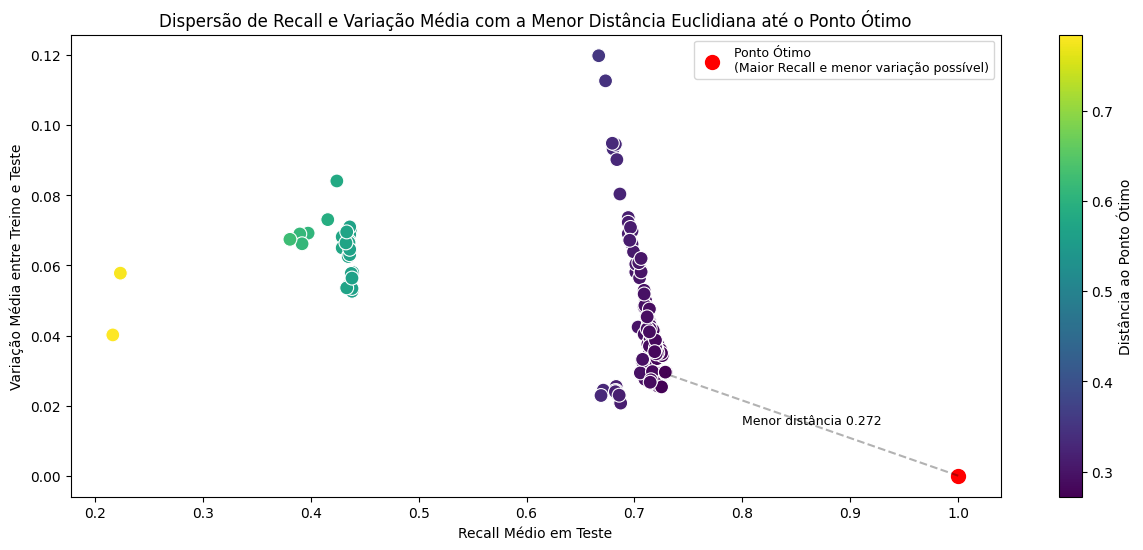

In [130]:
# Criando o DataFrame a partir dos resultados do trials
df_trials = pd.DataFrame(trials.results)
df_trials.rename(columns={'loss': 'Distância'}, inplace=True)

# Encontrando o ponto com a menor distância
min_dist_point = df_trials.loc[df_trials['Distância'].idxmin()]

# Definindo os valores mínimo e máximo de distância para ajustar a barra de cores
vmin = df_trials['Distância'].min()
vmax = df_trials['Distância'].max()

# Criando a figura e os eixos para o gráfico e a barra de cores
fig, ax = plt.subplots(figsize=(15, 6))

# Plotando o gráfico de dispersão
scatter_plot = sns.scatterplot(data=df_trials, x='Recall', y='Variação', hue='Distância', palette='viridis', ax=ax, s=100, legend=False)

# Adicionando o ponto ótimo (1, 0)
ax.scatter(1, 0, color='red', s=100, label='Ponto Ótimo\n(Maior Recall com menor variação possível)')

# Adicionando a linha para a menor distância
ax.plot([1, min_dist_point['Recall']], [0, min_dist_point['Variação']], 'k--', alpha=0.3)  # Linha preta pontilhada
mid_x = (1 + min_dist_point['Recall']) / 2
mid_y = (0 + min_dist_point['Variação']) / 2
ax.text(mid_x, mid_y, f'Menor distância {min_dist_point["Distância"]:.3f}', fontsize=9, color='black', ha='center')

# Ajustando os rótulos e título
ax.set_xlabel('Recall Médio em Teste')
ax.set_ylabel('Variação Média entre Treino e Teste')
ax.set_title('Dispersão de Recall e Variação Média com a Menor Distância Euclidiana até o Ponto Ótimo', fontsize=12)

# Adicionando a barra de cores com os limites ajustados
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Distância ao Ponto Ótimo')

# Adicionando a legenda
ax.legend(fontsize=9)

plt.show()

### 4.3 Desenvolvimento do MVM (Modelo Mínimo Viável)
#### 4.3.1 Criação do MVM:

##### 4.3.1.1 Ajuste do Modelo

In [131]:
# Ajuste do modelo final com os melhores hiperparâmetros
best_model = RandomForestClassifier(
    n_estimators=int(best_hyperparams['n_estimators']),
    class_weight=best_hyperparams['class_weight'],
    max_depth=int(best_hyperparams['max_depth']),
    min_samples_split=int(best_hyperparams['min_samples_split']),
    min_samples_leaf=int(best_hyperparams['min_samples_leaf']),
    criterion=best_hyperparams['criterion'],
    random_state=42,
    n_jobs=-1
)

**Validação do modelo final:**

Ao otimizar os hiperparâmetros do modelo, realizamos a validação cruzada focada apenas no *recall*. Agora, é fundamental analisarmos outras métricas com o modelo final. Na **validação cruzada K-Fold com estratificação**, o modelo é treinado e testado em diferentes subconjuntos de dados, **preservando a proporção das amostras de cada classe**. Cada subconjunto é utilizado uma vez para teste, enquanto os outros servem para treinamento. Em um K-Fold com K = 5, por exemplo, os dados são divididos em cinco partes iguais (20% dos dados em cada), onde o modelo é treinado em quatro partes e avaliado na quinta. Esse processo é repetido cinco vezes, garantindo que cada parte seja utilizada para teste pelo menos uma vez.

A validação cruzada K-Fold com estratificação oferece uma estimativa mais confiável do desempenho do modelo em dados não vistos, pois o modelo é testado em diferentes subconjuntos e sua performance é calculada pela média dos resultados obtidos em todas as iterações.

In [132]:
scaler = StandardScaler()
metrics = skf_metrics(model=best_model, X=X_train, y=y_train, scaler=scaler, n_splits=5)

print('Métricas do modelo:')
metrics.style.background_gradient(axis=None, subset=['Teste', 'Treino'])\
    .background_gradient(axis=None, subset=['Variação'], vmin=0, vmax=1, cmap='Reds')\
        .format({
            'Treino': '{:.3f}',
            'Teste': '{:.3f}',
            'Variação': lambda x: f'{x*100:.2f}%'
            })

Métricas do modelo:


In [133]:
# Treinamento do modelo final
best_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=30, min_samples_split=9,
                       n_estimators=1700, n_jobs=-1, random_state=42)

Até o momento, **o modelo final ainda não foi exposto aos valores de `X_test_scaled` e `y_test`**, que foram definidos durante a etapa de pré-processamento. Esses conjuntos de dados foram mantidos separados intencionalmente para garantir uma avaliação imparcial e objetiva do desempenho final do modelo. Após o ajuste dos hiperparâmetros e a validação cruzada nas fases anteriores, **utilizamos esses dados na validação final para medir o desempenho do modelo em um cenário real**, simulando dados completamente novos e nunca antes vistos pelo modelo. **Esse processo é essencial para validar se o modelo generaliza bem para novos dados** e confirmar a eficácia das métricas como *recall*, *precision* e AUC-ROC, garantindo que ele atenda aos objetivos do projeto.

In [134]:
# Métricas de Desempenho
print('Métricas de desempenho para o RandomForestClassifier (modelo final):')
performance_best_model = calculate_performance(best_model, X_train_scaled, y_train, X_test_scaled, y_test)
performance_best_model.style.background_gradient(axis=None, subset=['Teste', 'Treino'])\
    .background_gradient(axis=None, subset=['Variação'], vmin=0, vmax=1, cmap='Reds')\
        .format({
            'Treino': '{:.3f}',
            'Teste': '{:.3f}',
            'Variação': lambda x: f'{x*100:.2f}%'
            })

Métricas de desempenho para o RandomForestClassifier (modelo final):


,Treino,Teste,Variação
Métrica,,,
Acurácia,0.784,0.795,1.34%
AUROC,0.843,0.858,1.81%
KS,0.535,0.571,6.70%
Precision,0.481,0.497,3.48%
Recall,0.738,0.763,3.28%
F1,0.582,0.602,3.40%


In [135]:
variacao_performance = ((performance_best_model / performance_logreg_baseline) - 1)
print('Variação da performance de RandomForestClassifier (modelo final) sobre o modelo baseline:')
variacao_performance.style\
    .background_gradient(subset=['Teste', 'Treino'], vmin=-1, vmax=1, cmap='RdBu')\
        .background_gradient(subset=['Variação'], vmin=-1, vmax=1, cmap='RdBu_r').format("{:.2%}")

Variação da performance de RandomForestClassifier (modelo final) sobre o modelo baseline:


,Treino,Teste,Variação
Métrica,,,
Acurácia,-3.45%,-2.81%,97.32%
AUROC,13.14%,10.27%,-59.41%
KS,43.88%,31.77%,-59.39%
Precision,-24.97%,-27.28%,-48.63%
Recall,316.21%,291.60%,-66.40%
F1,109.54%,98.58%,-62.64%


Comparando o desempenho do ***RandomForestClassifier*** (modelo final) com o modelo ***baseline***, observamos uma **redução expressiva na variação entre as métricas de treino e teste** em quase todos os indicadores, com exceção da acurácia, que apresentou um aumento significativo na variação. A nossa principal métrica de interesse, o *Recall*, teve um crescimento impressionante de quase 300% no conjunto de teste, acompanhado por uma diminuição substancial da variação, reduzida em 66%. No entanto, esse ganho no *Recall* veio com uma queda no *Precision*, que sofreu uma redução de 27%, refletindo o esperado *trade-off* entre essas duas métricas.

Vale destacar também o aumento de 10% na **AUROC** (Área Sob a Curva ROC) em teste, o que representa uma melhora significativa na capacidade do modelo de discriminar entre classes. Esse avanço permitirá otimizar a definição do ***threshold*** (corte de probabilidade) mais adequado, ajustando-o de forma estratégica para atender aos objetivos do negócio, garantindo que o modelo seja não apenas mais preciso, mas também alinhado às metas operacionais e financeiras.

##### 4.3.1.2 Extração do Aprendizado do Modelo

**Importância das Variáveis:**

In [26]:
# Built-in feature importance
feature_names = best_model.feature_names_in_
importances = best_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 
                               'Importance': importances}
                               ).sort_values('Importance', ascending=False) 
feature_imp_df

,Feature,Importance
1,Idade,0.495498
0,Qte_Categorias,0.304860
2,Programa_Fidelidade,0.093588
3,Estado_Minas Gerais,0.075367
5,Estado_São Paulo,0.020179
4,Estado_Rio de Janeiro,0.010507


Modelos de *machine learning*, como o *Random Forest Classifier*, operam como <a href="https://pt.wikipedia.org/wiki/Caixa_preta_(teoria_dos_sistemas)" target="_blank">"caixas pretas"</a>, tornando difícil entender as razões por trás das probabilidades atribuídas às previsões. No entanto, ao utilizarmos o gráfico de resumo da biblioteca <a href="https://shap.readthedocs.io/en/latest/index.html" target="_blank">SHAP (*SHapley Additive exPlanations*)</a>, conseguimos desmistificar essa complexidade. Esse gráfico nos permite identificar rapidamente quais características são mais relevantes para as decisões do modelo, além de revelar como cada uma delas influencia as previsões. Com essa abordagem, não apenas ganhamos *insights* sobre o comportamento do modelo, mas também podemos adaptar nossas estratégias de negócio com base nas variáveis que mais impactam os resultados, promovendo uma tomada de decisão mais informada e eficaz.

In [34]:
# Criação do objeto explainer usando o modelo treinado
explainer = shap.TreeExplainer(best_model)

# Geração das explicações para o conjunto de dados de teste
explanation = explainer(X_test_scaled)

# Extração dos valores SHAP das explicações
shap_values = explanation.values

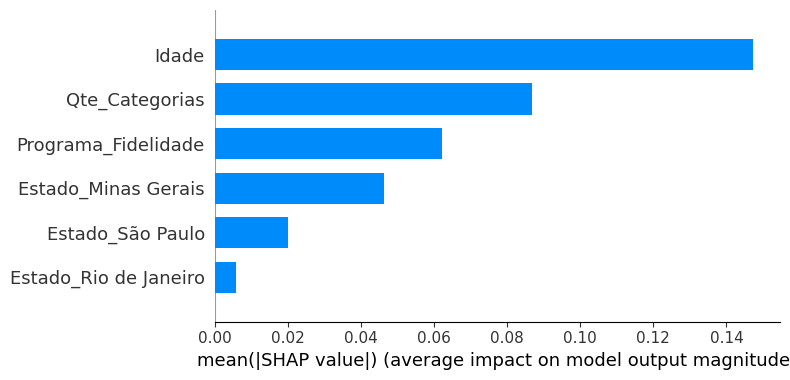

In [35]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=shap_values[..., 1],
                  plot_type='bar',
                  feature_names=feature_names,
            )

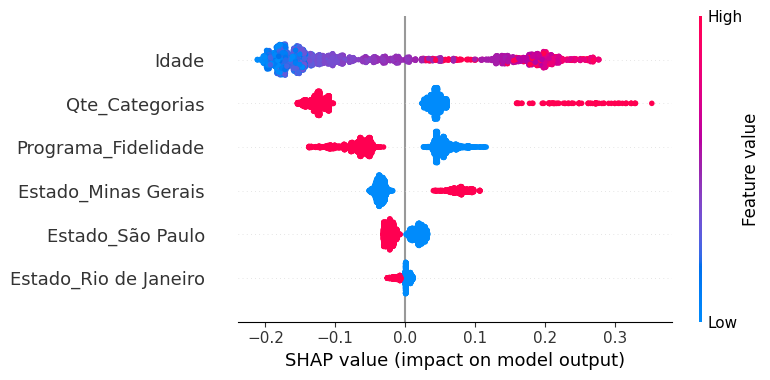

In [36]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo

features = X_test.copy()

shap.summary_plot(shap_values=shap_values[..., 1], 
                  features=features,
                  feature_names=feature_names,
                  plot_type='dot')

Podemos notar que o aprendizado do modelo, conforme capturado pelo SHAP *value*, está alinhado com a nossa [Análise de Correlação e Associação](#analise-de-correlacao-e-associacao). Isso nos proporciona uma maior confiança na implementação do modelo, pois confirma que as variáveis mais relevantes para as previsões são consistentes com nossas observações iniciais, fortalecendo a fundamentação para a formulação de planos de ação e estratégias, garantindo que as decisões tomadas sejam baseadas em uma compreensão sólida dos dados.

**Shapley Values:**

Nos gráficos explicativos abaixo, podemos visualizar como as características de um cliente específico influenciaram a previsão feita pelo nosso modelo de *machine learning*. O gráfico identifica e destaca os fatores que mais contribuíram para aumentar ou diminuir a probabilidade do evento em questão (neste caso, o ***churn***), oferecendo uma visão clara e detalhada do raciocínio por trás da decisão do modelo.

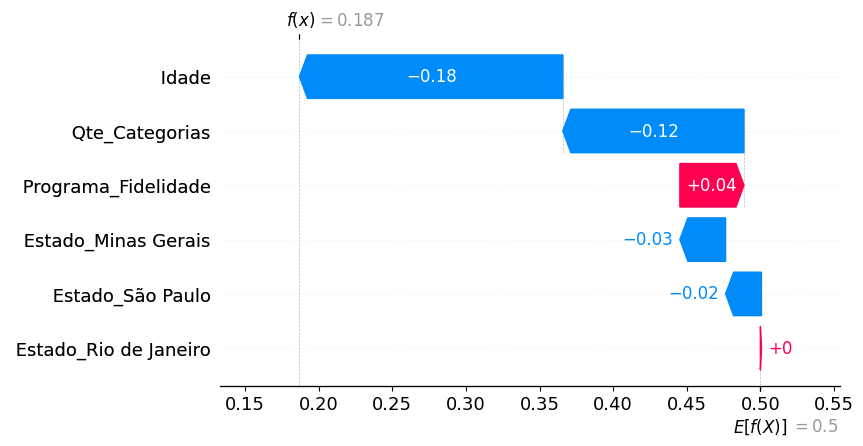

In [37]:
id_obs = 500

shap.plots._waterfall.waterfall_legacy(expected_value=explainer.expected_value[1],
                                       shap_values=shap_values[..., 1][id_obs],
                                       feature_names=feature_names, 
                                       features=features.values[id_obs])

In [38]:
shap.initjs()

shap.force_plot(base_value=explainer.expected_value[1], 
                shap_values=shap_values[..., 1][id_obs],
                feature_names=feature_names,
                features=features.values[id_obs])

##### 4.3.1.3 Matriz de Impacto Potencial

In [150]:
# Definir os cortes de probabilidade
thresholds = np.arange(0, 1.01, 0.01)

# Fazer previsões de probabilidade com o modelo carregado
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]


# Criar as matrizes de confusão e as matrizes de impacto para cada corte
impact_data = []

for threshold in thresholds:
    # Aplicar o corte de probabilidade para gerar previsões binárias
    y_pred = (y_prob >= threshold).astype(int)
    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='all')
    # normalize='all') retorna a % de cada valor sobre o total, permitindo escalar para o total de clientes da base

    # Calcular o impacto financeiro para cada valor da matriz de confusão
    impacto_potencial = conf_matrix * matriz_custos * n_cliente
                     
    
    impact_data.append({
        'threshold': threshold,
        'TN': impacto_potencial[0, 0],
        'FP': impacto_potencial[0, 1],
        'FN': impacto_potencial[1, 0],
        'TP': impacto_potencial[1, 1],
        'impacto_potencial': impacto_potencial.sum(),
    })

# Criar DataFrame
df_impact = pd.DataFrame(impact_data).set_index('threshold')

# Mostrar o DataFrame
df_impact

,TN,FP,FN,TP,impacto_potencial
threshold,,,,,
0.00,0.000000e+00,-238900.0,-0.000000e+00,1.056314e+06,8.174141e+05
0.01,0.000000e+00,-238900.0,-0.000000e+00,1.056314e+06,8.174141e+05
0.02,0.000000e+00,-238900.0,-0.000000e+00,1.056314e+06,8.174141e+05
0.03,0.000000e+00,-238900.0,-0.000000e+00,1.056314e+06,8.174141e+05
0.04,0.000000e+00,-238900.0,-0.000000e+00,1.056314e+06,8.174141e+05
...,...,...,...,...,...
0.96,4.369071e+06,-0.0,-1.056314e+06,0.000000e+00,3.312757e+06
0.97,4.369071e+06,-0.0,-1.056314e+06,0.000000e+00,3.312757e+06
0.98,4.369071e+06,-0.0,-1.056314e+06,0.000000e+00,3.312757e+06


In [151]:
import plotly.graph_objects as go

df_impact.reset_index(inplace=True)

# Encontrar os valores mínimo e máximo do df
min = abs(df_impact.min().min())
min = -min - 10 ** int(np.log10(min))

max = abs(df_impact.max().max())
max = max + 10 ** int(np.log10(max))


# Encontrar o índice do maior impacto_potencial
threshold_index_inicial = df_impact['impacto_potencial'].idxmax()

# Função para criar a figura inicial do gráfico de cascata
def create_waterfall_figure(df, threshold_index):
    threshold = df['threshold'].iloc[threshold_index]
    values = [
        df['TN'].iloc[threshold_index],
        df['FP'].iloc[threshold_index],
        df['FN'].iloc[threshold_index],
        df['TP'].iloc[threshold_index],
    ]
    labels = ['TN', 'FP', 'FN', 'TP']
    total = df['impacto_potencial'].iloc[threshold_index]

    fig = go.Figure()

    fig.add_trace(go.Waterfall(
        name="Impacto Potencial",
        orientation="v",
        measure=["relative"] * len(values) + ["total"],
        x=labels + ['Impacto Potencial'],
        y=values + [total],
        base=0,
        connector={"line": {"color": "rgba(63, 63, 63, 0.8)"}},
        decreasing={"marker": {"color": "#e65a6d"}}, #red
        increasing={"marker": {"color": "#a3dce8"}}, #blue
        totals={"marker": {"color": "#003755" if total >= 0 else "red"}},
        text=[f"R$ {valor(v)}" for v in values] + [f"R$ {valor(total)}"]
    ))

    fig.update_layout(
        title=f"Impacto Potencial para {n_cliente} clientes com Threshold {threshold:.2f}",
        xaxis_title="Categoria",
        yaxis_title="Impacto Financeiro (R$)",
        title_font_size=20,
        xaxis_title_font_size=16,
        yaxis_title_font_size=16,
        yaxis=dict(range=[min, max])
    )

    return fig

# Criação inicial da figura
fig = create_waterfall_figure(df_impact, threshold_index_inicial)

# Criar o controle deslizante
steps = []
for i in range(len(thresholds)):

    step = {
        'method': 'update',
        'args': [
            {
                'y': [
                    [df_impact['TN'].iloc[i], 
                     df_impact['FP'].iloc[i], 
                     df_impact['FN'].iloc[i], 
                     df_impact['TP'].iloc[i], 
                     df_impact['impacto_potencial'].iloc[i]],  # Valores do gráfico de cascata e impacto total
                ],
                'totals':{"marker": {"color": "#003755" if df_impact['impacto_potencial'].iloc[i] >= 0 else "red"}},
                'text': [
                    [f"R$ {valor(v)}" for v in [df_impact['TN'].iloc[i],
                                                df_impact['FP'].iloc[i], 
                                                df_impact['FN'].iloc[i], 
                                                df_impact['TP'].iloc[i], 
                                                df_impact['impacto_potencial'].iloc[i]]]  # Textos
                ]
            },
            {'title': f"Impacto Potencial para {n_cliente} clientes com Threshold {df_impact['threshold'].iloc[i]:.2f}"}
        ],
        'label': f"{thresholds[i]:.2f}"    
    }
    steps.append(step)

sliders = [{
    'active': threshold_index_inicial,
    'pad': {"t": 50},
    'steps': steps
}]

fig.update_layout(
    sliders=sliders
)

# Mostrar o gráfico
fig.show()


In [152]:
import plotly.express as px


# Encontrar o índice e o valor do maior impacto_potencial
max_index = df_impact['impacto_potencial'].idxmax()
max_value = df_impact['impacto_potencial'].max()

# Criar gráfico de barras para o impacto total
fig_bar = px.bar(df_impact, x='threshold', y='impacto_potencial',
                 title=f'Impacto Potencial para {n_cliente} vs Threshold',
                 labels={'threshold': 'Threshold', 'impacto_potencial': 'Impacto Potencial (R$)'})

# Alterar a cor da barra máxima
colors = ['#e65a6d'] * len(df_impact) #red
colors[max_index] = '#003755'  # Destacar a barra máxima com cor azul

fig_bar.update_traces(marker_color=colors)

# Adicionar anotação para o valor mais alto
fig_bar.add_annotation(
    x=df_impact['threshold'][max_index],
    y=max_value,
    text=f'Valor máximo: R$ {valor(max_value)}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-30,
    font=dict(color="#003755", size=12)
)

fig_bar.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

fig_bar.show()


In [153]:
threshold = df_impact['threshold'][max_index]

y_pred = (y_prob >= threshold).astype(int)

# Calcular a matriz de confusão
conf_matrix_mvm = confusion_matrix(y_test, y_pred)

# Multiplicando as matrizes e normalizando por 3000
resultado = conf_matrix_mvm * matriz_custos / 3_000 * n_cliente

df_resultado_mvm = impacto_financeiro(resultado, 'Não Churn', 'Churn')

print(f'Impacto financeiro usando o modelo mínimo viável com o corte {threshold}:')
df_resultado_mvm.style.format(precision=2, decimal=',', thousands='.')

Impacto financeiro usando o modelo mínimo viável com o corte 0.6:


In [154]:
# Ganho em relação ao Método Atual (R$)
df_ganho_em_valor_financeiro = df_resultado_mvm - df_resultado_sem_modelo

print('Ganho potencial ao usar o modelo (em R$):')
df_ganho_em_valor_financeiro.style.format(precision=2, decimal=',', thousands='.')

Ganho potencial ao usar o modelo (em R$):


In [155]:
ganho_total = df_ganho_em_valor_financeiro[('Predito', 'Total')][('Real', 'Total')]
ganho_sem_modelo = df_resultado_sem_modelo[('Predito', 'Total')][('Real', 'Total')]
ganho_em_percentual = ( ganho_total / ganho_sem_modelo)
print(f'Ganho potencial ao usar o modelo (em %): {ganho_em_percentual:.2%}')

Ganho potencial ao usar o modelo (em %): 27.01%


## 5. Validação do trabalho

### 5.1 Revisão por Pares

Revisão do modelo por outros cientistas de dados para garantir qualidade e aderência a boas práticas.
## 6. *Deploy* do Modelo
### 6.1 Implantação

Envio do modelo para produção com apoio da equipe de Engenharia de Dados.

In [77]:
import pickle

# Salvar o modelo
with open('random_forest_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Carregar o modelo
with open('random_forest_best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

### 6.2 Testes A/B

Para avaliar o desempenho das estratégias de previsão de *churn*, foram aplicadas **ações de retenção a clientes de um grupo de teste**. Os clientes do grupo de teste foram selecionados aleatoriamente da base geral e classificados como "em risco de *churn*" pelo novo modelo preditivo. O restante dos clientes atuou como **grupo de controle, mantendo a abordagem anterior**. A comparação entre os dois grupos permite medir a eficácia das novas estratégias em relação às práticas já estabelecidas.

Para assegurar que os ajustes nas estratégias fossem introduzidos de forma controlada, o grupo de teste foi expandido gradualmente. Inicialmente, 30% da base de clientes escolhidos aleatoriamente foi incluída no teste, e a cada mês essa proporção foi ampliada para 45%, 60%, 75%, 90%, até chegar a 100%. Essa expansão progressiva possibilita uma avaliação detalhada do impacto das mudanças, minimizando os riscos antes da aplicação total do novo modelo.

## 7. Acompanhamento e Documentação
### 7.1 Monitoramento do Modelo

O monitoramento contínuo das métricas de performance é essencial para avaliar a estabilidade e eficácia do modelo ao longo do tempo.

O acompanhamento detalhado do *churn* ao longo do tempo e das estratégias de retenção bem como o **Testes A/B** pode ser visualizado na página específica dedicada ao *Dashboard*. Para mais informações e visualizações completas sobre os resultados das ações implementadas, acesse a página [***Dashboard* de Monitoramento das Estratégias de Retenção de Clientes**](./Dashboard_de_Acompanhamento_do_Churn).

### 7.2 Documentação

Documentação detalhada do desenvolvimento do modelo, incluindo todas as etapas, decisões tomadas, e métricas de performance.
## 8. Nova *Sprint* de Melhorias
### 8.1 Melhorias Contínuas

Revisão do *backlog* para iniciar uma nova *sprint* com foco em melhorias, como atualização do público-alvo, adição de novas variáveis, e teste de novas técnicas.